# Part 1 : GDP Analysis of Indian States

## Part 1A

In [24]:
#Load Packages needed for this Project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import chardet
import glob
import os
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
sns.set_style("white")

UT=['Delhi', 'Chandigarh', 'Andaman_&_Nicobar', 'Puducherry', 'Dadra_&_Nagar_Haveli', 'Daman_&_Diu']

In [25]:
url = "https://raw.githubusercontent.com/dasarpai/DAI-Projects/main/Economics/Economy-Analysis/data/"

In [26]:
downloadfile = url + "Data-I-A-Download.csv"

!wget {downloadfile}

--2024-11-10 13:54:58--  https://raw.githubusercontent.com/dasarpai/DAI-Projects/main/Economics/Economy-Analysis/data/Data-I-A-Download.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3008 (2.9K) [text/plain]
Saving to: ‘Data-I-A-Download.csv.1’

Data-I-A-Download.c 100%[===================>]   2.94K  --.-KB/s    in 0s      

2024-11-10 13:54:58 (36.1 MB/s) - ‘Data-I-A-Download.csv.1’ saved [3008/3008]



In [88]:
all_files = ['NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv', 'NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv', 'NAD-Assam-GSVA_cur_2015-16.csv', 'NAD-Bihar-GSVA_cur_2015-16.csv', 'NAD-Chandigarh-GSVA_cur_2015-16.csv', 'NAD-Chhattisgarh-GSVA_cur_2016-17.csv', 'NAD-Delhi-GSVA_cur_2016-17.csv', 'NAD-Goa-GSVA_cur_2015-16.csv', 'NAD-Gujarat-GSVA_cur_2015-16.csv', 'NAD-Haryana-GSVA_cur_2016-17.csv', 'NAD-Himachal_Pradesh-GSVA_cur_2014-15.csv', 'NAD-Jharkhand-GSVA_cur_2015-16.csv', 'NAD-Karnataka-GSVA_cur_2015-16.csv', 'NAD-Kerala-GSVA_cur_2015-16.csv', 'NAD-Madhya_Pradesh-GSVA_cur_2016-17.csv', 'NAD-Maharashtra-GSVA_cur_2014-15.csv', 'NAD-Manipur-GSVA_cur_2014-15.csv', 'NAD-Meghalaya-GSVA_cur_2016-17.csv', 'NAD-Mizoram-GSVA_cur_2014-15.csv', 'NAD-Nagaland-GSVA_cur_2014-15.csv', 'NAD-Odisha-GSVA_cur_2016-17.csv', 'NAD-Puducherry-GSVA_cur_2016-17.csv', 'NAD-Punjab-GSVA_cur_2014-15.csv', 'NAD-Rajasthan-GSVA_cur_2014-15.csv', 'NAD-Sikkim-GSVA_cur_2015-16.csv', 'NAD-Tamil_Nadu-GSVA_cur_2016-17.csv', 'NAD-Telangana-GSVA_cur_2016-17.csv', 'NAD-Tripura-GSVA_cur_2014-15.csv', 'NAD-Uttarakhand-GSVA_cur_2015-16.csv', 'NAD-Uttar_Pradesh-GSVA_cur_2015-16.csv']

for file in all_files:
    downloadfile = url + file
    !wget {downloadfile}

--2024-11-10 14:08:05--  https://raw.githubusercontent.com/dasarpai/DAI-Projects/main/Economics/Economy-Analysis/data/NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2490 (2.4K) [text/plain]
Saving to: ‘NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv.2’

NAD-Andhra_Pradesh- 100%[===================>]   2.43K  --.-KB/s    in 0s      

2024-11-10 14:08:05 (39.9 MB/s) - ‘NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv.2’ saved [2490/2490]

--2024-11-10 14:08:05--  https://raw.githubusercontent.com/dasarpai/DAI-Projects/main/Economics/Economy-Analysis/data/NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.gi

In [89]:
df1A=pd.read_csv(url + "Data-I-A-Download.csv")

In [90]:
df1A.info() #West Bengal1 col has all null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Items  Description         11 non-null     object 
 1   Duration                   11 non-null     object 
 2   Andhra Pradesh             11 non-null     float64
 3   Arunachal Pradesh          9 non-null      float64
 4   Assam                      9 non-null      float64
 5   Bihar                      9 non-null      float64
 6   Chhattisgarh               11 non-null     float64
 7   Goa                        9 non-null      float64
 8   Gujarat                    9 non-null      float64
 9   Haryana                    11 non-null     float64
 10  Himachal Pradesh           7 non-null      float64
 11  Jammu & Kashmir            9 non-null      float64
 12  Jharkhand                  9 non-null      float64
 13  Karnataka                  9 non-null      float64
 

In [91]:
df1A.describe() #Does not give any meaningful info because GDP and %Growth in the same col. So ignore below analysis.

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
count,11.000000,9.000000,9.000000,9.000000,11.000000,9.000000,9.000000,11.000000,7.000000,9.000000,...,11.000000,7.000000,9.000000e+00,9.000000,0.0,7.000000,9.000000,11.000000,11.000000,1.100000e+01
mean,280986.561818,8201.516667,100018.167778,181565.673333,120748.879091,22450.120000,448568.674444,228667.271818,50673.064286,53343.001111,...,268570.787273,13739.691429,5.209237e+05,82588.947778,NaN,2759.814286,13707.002222,258693.004545,12527.435455,6.479952e+06
std,282573.532407,8073.276061,97589.497456,178700.497677,120928.480448,21443.429799,438025.627165,228195.895576,48384.121107,51712.668467,...,268734.549079,13240.797263,5.087288e+05,80553.858327,NaN,2627.016700,13399.003286,258176.516280,12445.889343,6.433000e+06
min,8.430000,12.070000,9.560000,10.590000,10.980000,-10.020000,10.820000,9.180000,10.140000,4.700000,...,11.700000,12.780000,1.051000e+01,8.120000,NaN,10.890000,8.840000,10.960000,10.140000,9.990000e+00
25%,14.025000,14.790000,13.190000,14.250000,12.995000,10.750000,11.470000,14.135000,14.155000,11.310000,...,12.840000,17.030000,1.365000e+01,13.650000,NaN,13.905000,14.710000,13.095000,11.815000,1.224500e+01
50%,379402.000000,11063.000000,143175.000000,247144.000000,158074.000000,35921.000000,615606.000000,297539.000000,72720.000000,78254.000000,...,359433.000000,19208.000000,7.240490e+05,115523.000000,NaN,3979.000000,18768.000000,343767.000000,16818.000000,8.736039e+06
75%,495370.000000,14602.000000,177745.000000,317101.000000,220836.000000,40633.000000,807623.000000,419062.000000,88792.000000,95893.000000,...,481682.000000,23628.000000,9.441460e+05,149817.000000,NaN,4790.000000,24787.000000,468103.500000,22979.500000,1.183519e+07
max,699307.000000,18784.000000,224234.000000,413503.000000,290140.000000,45002.000000,994316.000000,547396.000000,104369.000000,118387.000000,...,654294.000000,29667.000000,1.153795e+06,184091.000000,NaN,5721.000000,30304.000000,622385.000000,29557.000000,1.525103e+07


In [92]:
df1A.head(3) # To see what kind of data in the dataset

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0


In [93]:
df1A.tail(3) # To see what kind of data in the dataset

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99
10,(% Growth over previous year),2016-17,14.65,NaN,NaN,NaN,11.26,NaN,NaN,12.82,...,13.67,NaN,NaN,NaN,NaN,NaN,NaN,12.76,11.40,11.52


In [94]:
#This dataset has GDP detail of 33 states/UT and All_India
len(list(df1A.columns))-3

33

In [95]:
# Colums names which has null values (in %) compare to all the rows of dataset
round(pd.Series(df1A.isnull().sum(axis=0)/len(df1A.index)*100),2).sort_values(ascending=False)

,0
West Bengal1,100.00
Rajasthan,36.36
Punjab,36.36
Nagaland,36.36
Mizoram,36.36
Manipur,36.36
Himachal Pradesh,36.36
Maharashtra,36.36
Andaman & Nicobar Islands,36.36
Tripura,36.36


###### Task1: Remove the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.

In [96]:
#Because there are 22 null values in this row out of 36
Cond1=df1A['Items  Description']=="(% Growth over previous year)"
Cond2=df1A['Duration']=='2016-17'
df1A=df1A[~(Cond1 & Cond2)]

In [97]:
#Check the spread of null data across different column.
pd.Series(df1A.isnull().sum(axis=0)/len(df1A.index)*100).sort_values(ascending=False).head(10)

,0
West Bengal1,100.0
Rajasthan,30.0
Punjab,30.0
Nagaland,30.0
Mizoram,30.0
Manipur,30.0
Himachal Pradesh,30.0
Maharashtra,30.0
Andaman & Nicobar Islands,30.0
Tripura,30.0


In [98]:
df1A.isnull().sum(axis=1) #Only GDP data points for last 2 years missing

,0
0,1
1,1
2,1
3,1
4,10
5,23
6,1
7,1
8,1
9,10


In [99]:
#Delete West Bengal1 col because 100% row are blank for this col. We cannot do any analysis for this.
df1A=df1A.drop("West Bengal1", axis=1)

In [100]:
df1A.isnull().sum(axis=1) #Only GDP data points for last 2 years missing

,0
0,0
1,0
2,0
3,0
4,9
5,22
6,0
7,0
8,0
9,9


###### df1A Transformation starts from Here

In [101]:
# Part 1 of Transformation
#Gel the list of all the state for which we have data
All_Cols=df1A.columns
All_States = df1A.columns[2:len(All_Cols)-1]

#Create 2 dataframes one for GDP & another for GDP Percentage.
df1A_GSDP     = df1A.iloc[0:6,0:len(All_Cols)]
df1A_GSDP_Per = df1A.iloc[6:11,0:len(All_Cols)]

#This data frame will exclude All_India Data
#df1A_GSDP = df1A.iloc[0:6,0:len(All_Cols)-1]
#df1A_GSDP_Per=df1A.iloc[6:11,0:len(All_Cols)-1]



In [102]:
# Part 2 of Transformation
#Impute Null Values for GDP Growth % using mean of that State's GDP Grwoth
col=0
cols=len(All_States)
while col < cols:
    col_name=All_States[col]
    df1A_GSDP_Per[   col_name  ].fillna( round(df1A_GSDP_Per[ col_name ].mean(),2), inplace=True)
    col+=1


<ipython-input-102-6efdfeac855d>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1A_GSDP_Per[   col_name  ].fillna( round(df1A_GSDP_Per[ col_name ].mean(),2), inplace=True)


In [103]:
# Part 3 of Transformation
# Impute NaN values for GDP. For every state we need to get the mean of
# GDP % Growth and the increment last years's GDP value by that mean value.

col=0
cols=len(All_States)
rows=len(df1A_GSDP)
while col < cols:
    col_name=All_States[col]
    #print (  df1A_GSDP[df1A_GSDP[ col ].isnull()])
    newGDP = 0 #round(df1A_GSDP_Per[    col    ].mean(),2)
    row=1
    while row<rows:
        thisGSDP=float(df1A_GSDP.loc[row,[col_name]])
        if np.isnan(thisGSDP):
            thisGSDP= round( float(df1A_GSDP.loc[row-1,[col_name]]) * (100 + df1A_GSDP_Per[col_name].mean()) / 100,0)
            df1A_GSDP[   col_name  ].fillna( thisGSDP , inplace=True)
        row+=1
    col+=1

<ipython-input-103-14683a78d810>:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  thisGSDP=float(df1A_GSDP.loc[row,[col_name]])
<ipython-input-103-14683a78d810>:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  thisGSDP=float(df1A_GSDP.loc[row,[col_name]])
<ipython-input-103-14683a78d810>:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  thisGSDP=float(df1A_GSDP.loc[row,[col_name]])
<ipython-input-103-14683a78d810>:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  thisGSDP=float(df1A_GSDP.loc[row,[col_name]])
<ipython-input-103-14683a78d810>:14: FutureWarning: Calling float on a single element Se

In [104]:
# Part 4 of Transformation
#Recreate df1A which does not have any null value
# df1A=pd.DataFrame.append(df1A_GSDP,df1A_GSDP_Per)

df1A = pd.concat([df1A_GSDP, df1A_GSDP_Per], ignore_index=True) # Use pd.concat instead

In [105]:
#Check again if any null value in any row
df1A.isnull().sum(axis=1)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [106]:
# Part 5 of Transformation
#Transpose Table : This is Part1 of Transformation
df1A2=df1A.transpose()
df1A2.reset_index(inplace=True)
#df1A2.head(3)

In [107]:
# Part 6 of Transformation
#Generate Column Names
Cols=['State']
yr=11
while yr<=16:
    Cols.append("GSDP:20"+str(yr)+"-"+str(yr+1))
    yr+=1

yr=12
while yr<=15:
    Cols.append("Growth%:20"+str(yr)+"-"+str(yr+1))
    yr+=1

#Rename Columns
df1A2.columns=Cols

#Remove top 2 Redundant Rows
df1A2=df1A2[2:]

In [108]:
# # Part 7 of Transformation
# #Create Final DataFrame
# statecol=df1A2[Cols[0]]
# RepeatTime=len(statecol)
# First=True

# i=1
# while i<=10:

#     Data=df1A2[Cols[i]]
#     Type=[ Cols[i].split(":")[0]]*RepeatTime
#     Duration=[ Cols[i].split(":")[1]]*RepeatTime
#     i+=1
#     if First:
#         df1A_Final = pd.DataFrame(  list(zip(statecol,Type,Duration,Data)) )
#         First=False
#     else:
#         df1A_Final = df1A_Final.append( list(zip(statecol,Type,Duration,Data)) )

# #Rename columns. Because state names should be consistent for merging purpose.
# df1A_Final.columns=['State','Type','Duration','Amount']
# df1A_Final.replace({'State': {'Andhra Pradesh ': 'Andhra_Pradesh'}}, inplace=True)
# df1A_Final.replace({'State': {'Uttar Pradesh': 'Uttar_Pradesh'}}, inplace=True)
# df1A_Final.replace({'State': {'Arunachal Pradesh': 'Arunachal_Pradesh'}}, inplace=True)
# df1A_Final.replace({'State': {'Tamil Nadu': 'Tamil_Nadu'}}, inplace=True)
# df1A_Final.replace({'State': {'Madhya Pradesh': 'Madhya_Pradesh'}}, inplace=True)
# df1A_Final.replace({'State': {'Himachal Pradesh': 'Himachal_Pradesh'}}, inplace=True)
# df1A_Final.replace({'State': {'Jammu & Kashmir': 'Jammu_&_Kashmir'}}, inplace=True)
# df1A_Final.replace({'State': {'All_India GDP': 'All_India'}}, inplace=True)
# df1A_Final.replace({'State': {'Andaman & Nicobar Islands': 'Andaman_&_Nicobar_Islands'}}, inplace=True)


In [109]:
#Tranformation is complete. Datframe is ready for all type of querries. check it now.
df1A_Final.head(5)

,State,Type,Duration,Amount
0,Andhra_Pradesh,GSDP,2011-12,379402.0
1,Arunachal_Pradesh,GSDP,2011-12,11063.0
2,Assam,GSDP,2011-12,143175.0
3,Bihar,GSDP,2011-12,247144.0
4,Chhattisgarh,GSDP,2011-12,158074.0


###### Task 2: Calculate the average growth of states over the duration 2013-14, 2014-15 and 2015-16

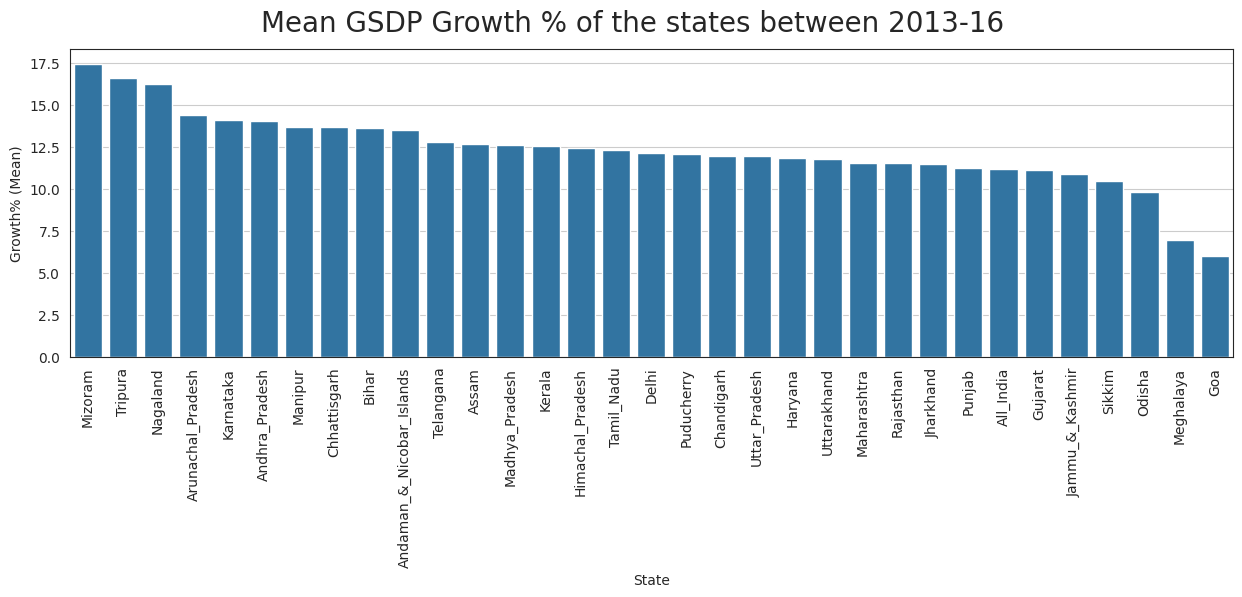

In [110]:
#Calculate the average growth of states over the duration 2013-14, 2014-15 and 2015-16
Cond1 = (df1A_Final.Type=='Growth%')
Cond2 = (df1A_Final['Duration']=='2013-14') | \
        (df1A_Final['Duration']=='2014-15') | \
        (df1A_Final['Duration']=='2015-16')
df1A_2013_16 = df1A_Final[Cond1 & Cond2]

#print(df1A_2013_16.sort_values(['State','Duration']))

df1A_2013_16_Group = df1A_2013_16.groupby("State")
df1A_2013_16_Group = round(df1A_2013_16_Group.Amount.mean(),2).sort_values(ascending=False)
df1A_2013_16_Group = pd.DataFrame(df1A_2013_16_Group)
df1A_2013_16_Group.reset_index(inplace=True)
df1A_2013_16_Group.columns = ['State', 'Growth% (Mean)']

fig= plt.figure(figsize=(15,4))
fig.suptitle('Mean GSDP Growth % of the states between 2013-16', fontsize=20)
plt.grid()


grid=sns.barplot(x='State',y='Growth% (Mean)',data=df1A_2013_16_Group )


sns.set_style("white")

# Rotate the labels on x-axis
for item in grid.get_xticklabels():
    item.set_rotation(90)

plt.savefig('Mean-GSDP-Growth%-Of-The-States-Between-2013-16.png', dpi=150)

In [111]:
# This function gives data in required structure format for Plotting 1A data
def getGSDP_Data(Years):
    Cond1 = ((df1A_Final.Type=='GSDP') & (df1A_Final.State!='All_India'))

    if Years=="2015-16":
        Cond2 = (df1A_Final.Duration=='2015-16')
    else:
        Cond2 =( (df1A_Final['Duration']=='2013-14') | \
                (df1A_Final['Duration']=='2014-15') | \
                (df1A_Final['Duration']=='2015-16') )

    df1A_Avg1 = df1A_Final[Cond1 & Cond2]

    df1A_Avg_Group1 = df1A_Avg1.groupby(['State','Duration'])
    df1A_Avg_Group1 = round(df1A_Avg_Group1.Amount.mean()/100000,2).sort_values(ascending=False)

    df1A_Avg_Group1 = pd.DataFrame(df1A_Avg_Group1)
    df1A_Avg_Group1.reset_index(inplace=True)
    df1A_Avg_Group1.columns = ['State', 'Duration', 'GSDP (Mean) in Lakh Cr.']
    return df1A_Avg_Group1

In [112]:
# Function to Plot GSDP of the states
def plotGSDP(Years):

    #Get the data for plotting
    df1A_GSDP=getGSDP_Data(Years)

    fig= plt.figure(figsize=(15,5))
    if Years=="2015-16":
        fig.suptitle('GSDP for the year 2015-16', fontsize=20)
    else:
        fig.suptitle('Mean GSDP between 2013-16', fontsize=20)

    plt.grid()

    grid=sns.barplot(x='State',y='GSDP (Mean) in Lakh Cr.',data=df1A_GSDP, ci=None )
    sns.set_style("white")

    # Rotate the labels on x-axis
    for item in grid.get_xticklabels():
        item.set_rotation(90)

    if Years=="2015-16":
        plt.savefig('GSDP-for-the-year-2015-16.png', dpi=150)
    else:
        plt.savefig('Mean-GSDP-Between-2013-16.png', dpi=150)

<ipython-input-112-db4d3e679b62>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  grid=sns.barplot(x='State',y='GSDP (Mean) in Lakh Cr.',data=df1A_GSDP, ci=None )


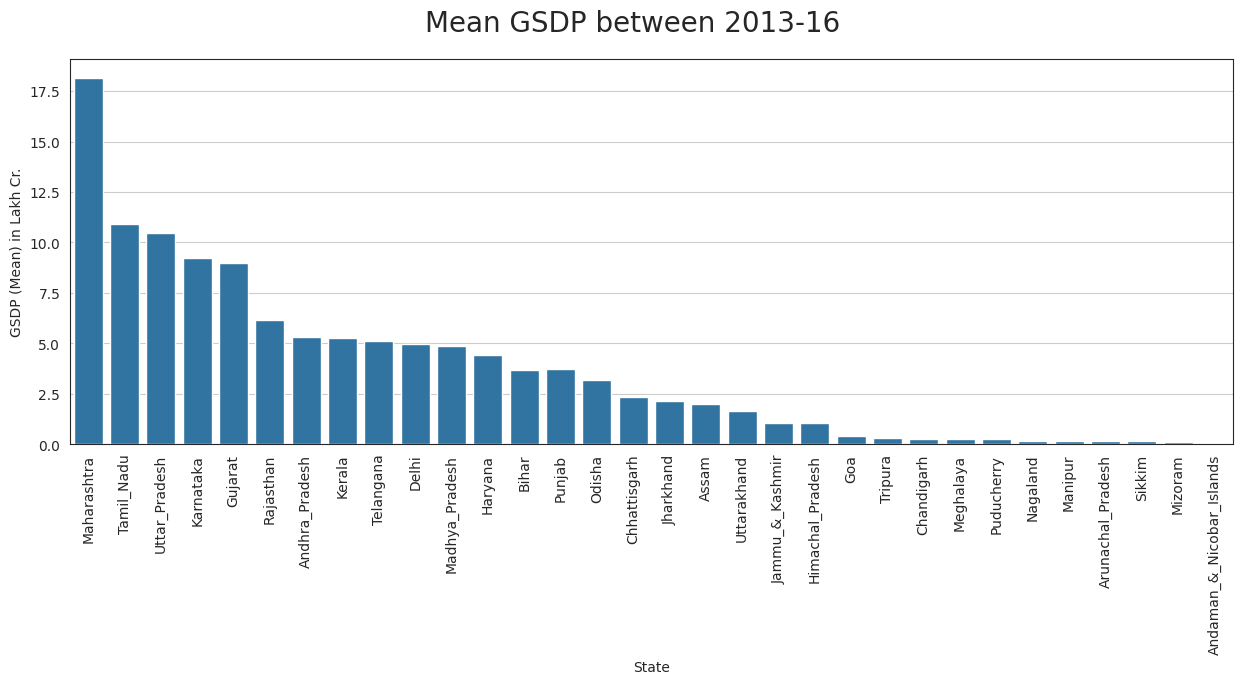

In [113]:
#Plot the GSDP of State over the duration 2013-16
plotGSDP('2013-16')

##### Task 3 Which states have been growing consistently fast, and which ones have been struggling?

In [114]:
#This function gives GDP Growth% data in the required format for plotting purpose
def get_gsdpGrowthData():
    cond1 = (df1A_Final.Type=='Growth%')
    df1A_Avg2 = df1A_Final[cond1]

    df1A_Avg_Group2 = df1A_Avg2.groupby(['State','Duration'])
    df1A_Avg_Group2 = round(df1A_Avg_Group2.Amount.mean(),2).sort_values(ascending=False)
    df1A_Avg_Group2 = pd.DataFrame(df1A_Avg_Group2)
    df1A_Avg_Group2.reset_index(inplace=True)
    df1A_Avg_Group2.columns = ['State', 'Duration', 'Growth%']
    return df1A_Avg_Group2

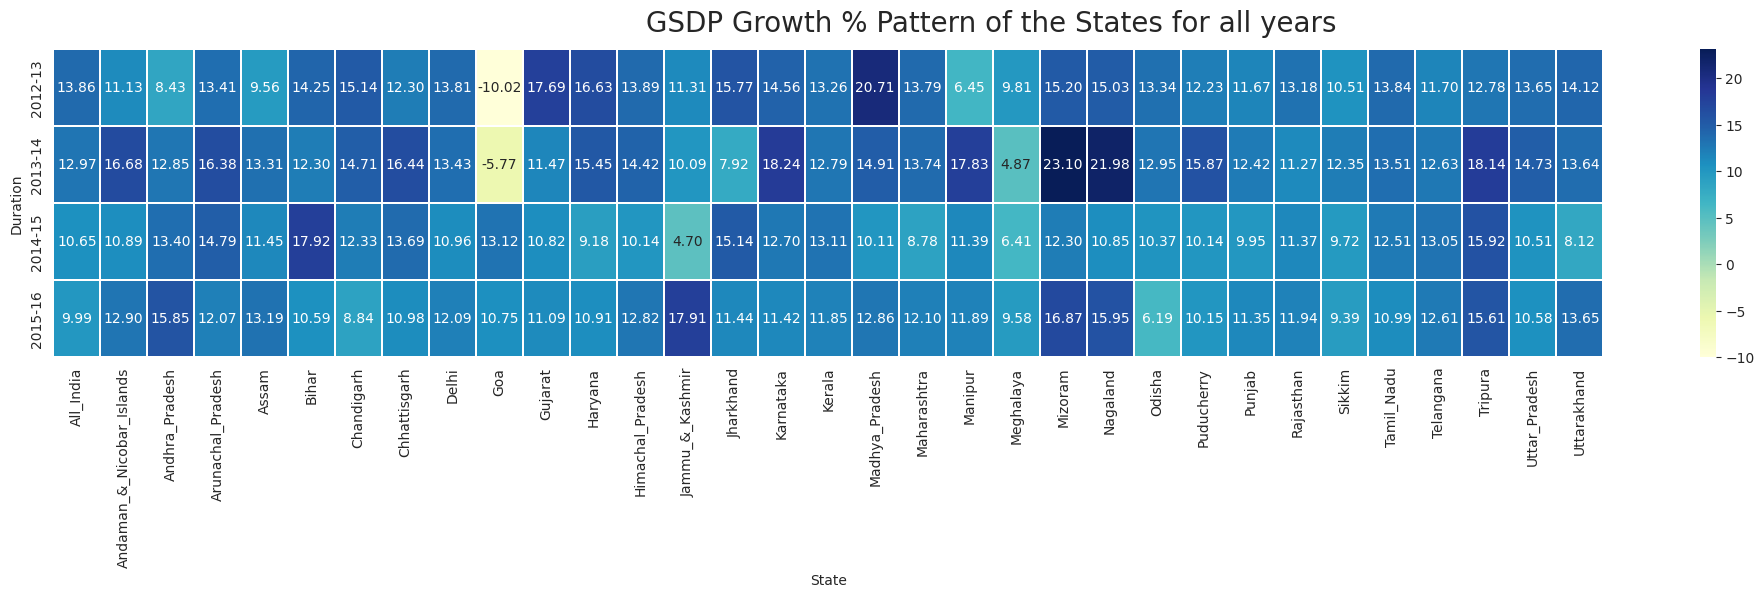

In [115]:
#Plot GSDP, Growth% Patterns of All States

df1A_gsdpGrowthData = get_gsdpGrowthData()

fig= plt.figure(figsize=(25,4))
fig.suptitle('GSDP Growth % Pattern of the States for all years', fontsize=20)

#Heatmap is much better to show this info
pivot = pd.pivot_table(df1A_gsdpGrowthData, values='Growth%', index='Duration', columns='State', aggfunc='mean')
sns.heatmap(pivot, annot=True, linewidths=.2, fmt="2.2f", cmap="YlGnBu")
sns.set_style("white")

plt.savefig('GSDP-Growth%-Pattern-of-the-States-for-All-Years.png', dpi=150)

###### Task 4: Curiosity exercise - what has been the average growth rate of your home state, and how does it compare to the national average over this duration?

###### Task 5: Plot the total GDP of the states for the year 2015-16:

<ipython-input-112-db4d3e679b62>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  grid=sns.barplot(x='State',y='GSDP (Mean) in Lakh Cr.',data=df1A_GSDP, ci=None )


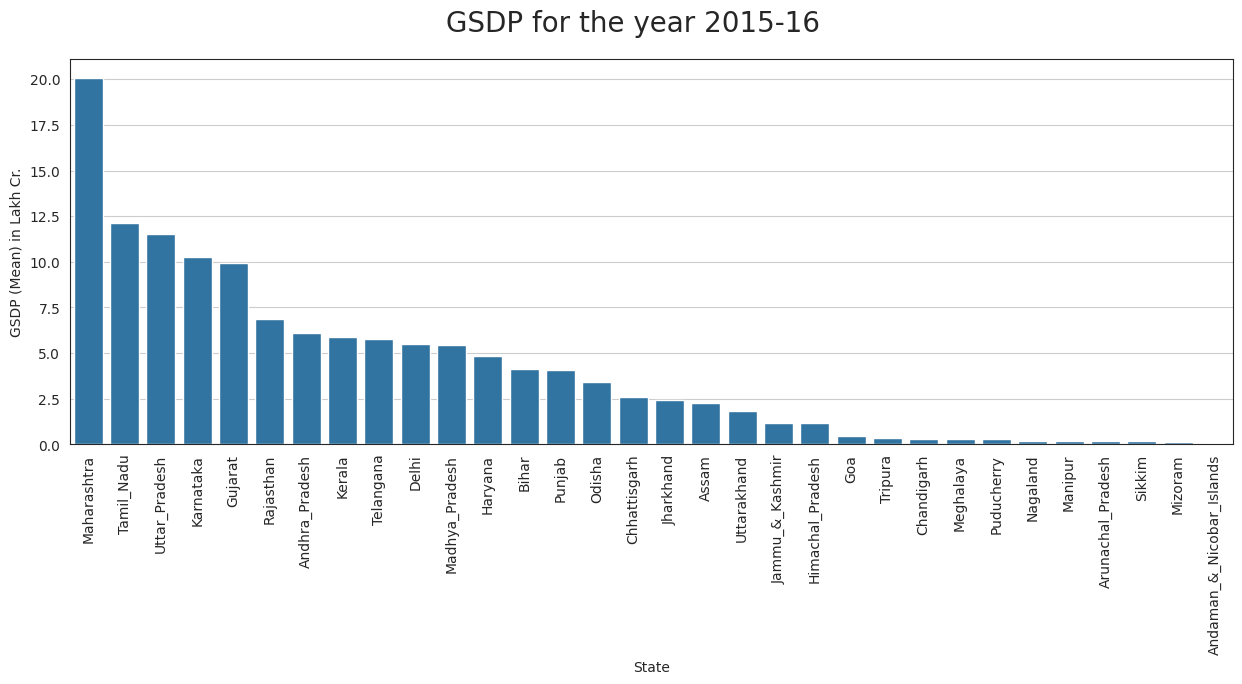

In [116]:
#Plot the GSDP of states over the duration 2015-16
plotGSDP('2015-16')

##### Task 6: Identify the top-5 and the bottom-5 states based on total GDP

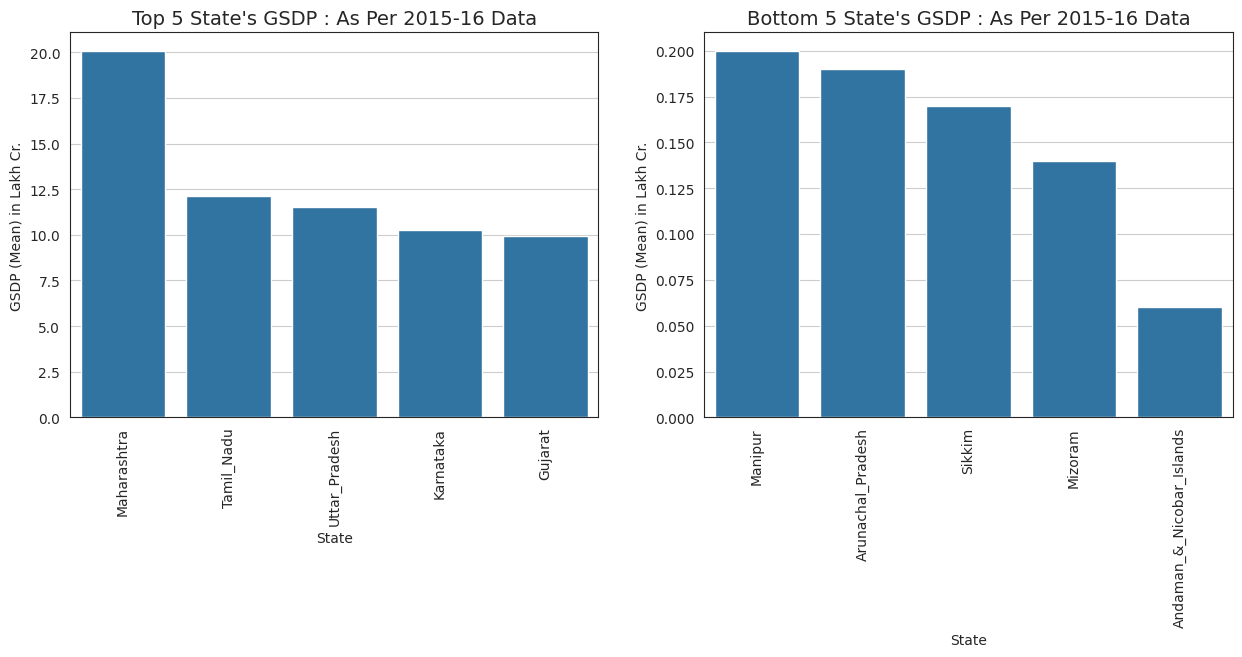

In [117]:
df1A_GSDP=getGSDP_Data("2015-16")
plt.figure(figsize=(15,5))
fig= plt.subplot(1,2,1)
plt.grid()

ax= plt.gca()
ax.set_title("Top 5 State's GSDP : As Per 2015-16 Data", fontsize=14)
grid=sns.barplot(x='State',y='GSDP (Mean) in Lakh Cr.',data=df1A_GSDP.head(5) )

# Rotate the labels on x-axis
for item in grid.get_xticklabels():
    item.set_rotation(90)

######################################################################
fig = plt.subplot(1,2,2)
plt.grid()

ax= plt.gca()
ax.set_title("Bottom 5 State's GSDP : As Per 2015-16 Data", fontsize=14)
grid=sns.barplot(x='State',y='GSDP (Mean) in Lakh Cr.',data=df1A_GSDP.tail(5) )
sns.set_style("white")

# Rotate the labels on x-axis
for item in grid.get_xticklabels():
    item.set_rotation(90)

plt.savefig('Top5-Bottom5-GSDP-as-per-2015-16.png', dpi=150)

## Part IB

##### Creating IB Dataset

In [118]:
downloadfile = url + "NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv"

!wget {downloadfile}

df1B=pd.read_csv('NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv')
#df1B

--2024-11-10 14:08:37--  https://raw.githubusercontent.com/dasarpai/DAI-Projects/main/Economics/Economy-Analysis/data/NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2490 (2.4K) [text/plain]
Saving to: ‘NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv.3’

NAD-Andhra_Pradesh- 100%[===================>]   2.43K  --.-KB/s    in 0s      

2024-11-10 14:08:37 (33.1 MB/s) - ‘NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv.3’ saved [2490/2490]



##### Understanding IB dataset

- S.No. = 1,2,3,4,5,6,7,8,9,10,11 => Name of the major sectors and their deail GSVA data
- S.No. = 1,2 and sub sections are Sub-sector of Primary
- S.No. = 3,4,5 are Sub-sector of Secondary
- S.No. = 6,7,8,9,10,11 are Sub-sector of Tertiary Sector

#==========================================
- S.No. = 12 is Total GSVA of a state (Gross State Value Added at basic price)
- S.No. = 13 is Total Taxes of a state
- S.No. = 14 is Total Subsidies of a state
- S.No. = 15 is Total GSDP of a state (GSVA + Taxes - Subsidies)
- S.No. = 16 is Total Population of a state
- S.No. = 17 is Total Per-Capita-GSDP of a state

#=============================================
- S.No. =Total => Contains Primary, Secondary & Tertiary industry GSVA data
- The data provided for few states is missing for some of the financial year

##### Mergning all IB of every states into db1B_Final

In [119]:
#Create a list of all the files which has GSDP data
files=os.listdir()
All_State_Files=[]
for filename in files:
    if filename[0:3]=="NAD":
        if filename.split("-")[1] not in UT: # Do not add data from union Terretories
            All_State_Files.append(filename)

#Create a list of all the states for which data is available
All_States=[]
i=0
while i<len(All_State_Files):
    All_States.append(All_State_Files[i].split("-")[1])
    i+=1

#Create a list of all the years for which data is available
Durations=[]
States=[]
i=0
while i< len(All_State_Files):
    Durations.append(All_State_Files[i].split("cur")[1][1:8])
    States.append(All_State_Files[i].split("-")[1])
    i+=1


In [120]:
# Generate missing years data summary
Durations1=['2011-12','2012-13','2013-14','2014-15','2015-16','2016-17']
i=0
while i<len(Durations1):
    print ("For year ", Durations1[i], "Only " ,Durations.count(Durations1[i]), " Records")
    i+=1

For year  2011-12 Only  0  Records
For year  2012-13 Only  0  Records
For year  2013-14 Only  0  Records
For year  2014-15 Only  8  Records
For year  2015-16 Only  11  Records
For year  2016-17 Only  11  Records


In [121]:
#Only 8 States has data upto 2016-17
#Only 19 States has data upto 2015-16
#All 27 States has data upto 2014-15
# UTs are excluded

In [122]:
def find_encoding(fname):
    r_file = open(fname, 'rb').read()
    result = chardet.detect(r_file)
    charenc = result['encoding']
    return charenc

In [123]:
# # Create a List of Dataframe which contains data of all the  states.
# # In this list every dataframe has one extra column "State"
# i=0
# List_of_DFs=[]
# while i< len(All_States):
#     file=All_State_Files[i]
#     encode=find_encoding(file)
#     #if encode=="ascii":
#     #    encode="utf-8"

#     df=pd.read_csv(file, sep="," ,encoding=encode)
#     df['State']=All_States[i]
#     List_of_DFs.append(df)
#     i=i+1

# del (df)

# #From List o Dataframes create a Master Dataframe which contains data of all the  states
# df1B_Final=List_of_DFs[0]
# i=1
# while i<len(All_States):
#     df1B_Final=pd.DataFrame.append(df1B_Final,List_of_DFs[i],sort=False)
#     i+=1


In [124]:
# Create a List of Dataframe which contains data of all the  states.
# In this list every dataframe has one extra column "State"
i=0
List_of_DFs=[]
while i< len(All_States):
    file=All_State_Files[i]
    encode=find_encoding(file)
    #if encode=="ascii":
    #    encode="utf-8"

    df=pd.read_csv(file, sep="," ,encoding=encode)
    df['State']=All_States[i]
    List_of_DFs.append(df)
    i=i+1

del (df)

#From List o Dataframes create a Master Dataframe which contains data of all the  states
df1B_Final=List_of_DFs[0]
i=1
while i<len(All_States):
    # Use pd.concat instead of pd.DataFrame.append
    df1B_Final=pd.concat([df1B_Final,List_of_DFs[i]], ignore_index=True, sort=False)
    i+=1

In [125]:
df1B_Final.State.unique()

array(['Andhra_Pradesh', 'Arunachal_Pradesh', 'Haryana', 'Manipur',
       'Odisha', 'Tamil_Nadu', 'Nagaland', 'Rajasthan', 'Tripura',
       'Chhattisgarh', 'Assam', 'Telangana', 'Sikkim', 'Mizoram',
       'Meghalaya', 'Gujarat', 'Goa', 'Himachal_Pradesh', 'Punjab',
       'Jharkhand', 'Karnataka', 'Madhya_Pradesh', 'Bihar',
       'Uttar_Pradesh', 'Kerala', 'Maharashtra', 'Uttarakhand'],
      dtype=object)

In [126]:
#Treating extra characters in Sno
Sno_WithError = list(filter(lambda x: x.rstrip()[-1]=='.', df1B_Final['S.No.']))
for Wrong_Sno in Sno_WithError:
    #print (df1B_Final['S.No.'] [df1B_Final['S.No.']==Wrong_Sno])
    #print (Wrong_Sno.split(".")[0])
    df1B_Final['S.No.'] [  df1B_Final['S.No.']==Wrong_Sno ] = Wrong_Sno.split(".")[0]

<ipython-input-126-c480bccee379>:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1B_Final['S.No.'] [  df1B_Final['S.No.']==Wrong_Sno ] = Wrong_Sno.split(".")[0]
<ipython-input-126-c480bccee379>:6: SettingWithCopyWarning: 
A value is tryin

In [127]:
# #Convert Year Column data into rows for analysis purpose
# Durations=['2011-12','2012-13','2013-14','2014-15','2015-16','2016-17']

# Sno=df1B_Final['S.No.']
# Item=df1B_Final['Item']
# State=df1B_Final['State']
# First=True
# for Duration in Durations:
#     Data=df1B_Final[Duration]
#     Dur=[Duration]*len(Data)
#     if First:
#         StateData=list(zip(Sno, Item, State, Dur, Data))
#         df1B_Final2 = pd.DataFrame(StateData)
#         First=False
#     else:
#         StateData=list(zip(Sno, Item, State, Dur, Data))
#         df1B_Final2 = df1B_Final2.append(StateData)
#         i=1

# df1B_Final2.columns=['Sno','Item','State','Duration','Amount']

In [128]:
#Convert Year Column data into rows for analysis purpose
Durations=['2011-12','2012-13','2013-14','2014-15','2015-16','2016-17']

Sno=df1B_Final['S.No.']
Item=df1B_Final['Item']
State=df1B_Final['State']
First=True
for Duration in Durations:
    Data=df1B_Final[Duration]
    Dur=[Duration]*len(Data)
    if First:
        StateData=list(zip(Sno, Item, State, Dur, Data))
        df1B_Final2 = pd.DataFrame(StateData)
        First=False
    else:
        StateData=list(zip(Sno, Item, State, Dur, Data))
        # Use pd.concat instead of append
        df1B_Final2 = pd.concat([df1B_Final2, pd.DataFrame(StateData)], ignore_index=True)
        i=1

df1B_Final2.columns=['Sno','Item','State','Duration','Amount']

In [129]:
#Null Value Treatment
#Two kind of missing data
#1. In some of the states there are few line items for which there is NaN
#in number data for a particular year.
#2. There are few states for which a particular FY no data exists

#I am removing all those records where above 2 conditions are true.
#They are not going to affect our analysis in any way.

#The reason for doing so is.. Considering any kind of mean/mode/average of
#nation for any states subsector and year will be gross mis-representation of the data for that year & state & lineItem

df1B_Final2 = df1B_Final2[~np.isnan(df1B_Final2['Amount'])]

In [130]:
# Duplicate Value Treatment
# There are some records for which item is suffixed by * or ** because of some unknown
# reason(s) to me. I am assuming if I remove * or ** from the end of Item and
# merge all the values together then they are not going to affect my analysis.
# In fact it is required for us to generate Sub-sector wise report in coming steps.
set(list(df1B_Final2 [ df1B_Final2['Item'].str.contains('\*', regex=True) ].Item))

{'Road transport*',
 'Road transport**',
 'Services incidental to transport*',
 'Trade & repair services*'}

In [131]:
#Replace these values
df1B_Final2.loc[df1B_Final2.Item == 'Services incidental to transport*', 'Item'] = "Services incidental to transport"
df1B_Final2.loc[df1B_Final2.Item == 'Trade & repair services*', 'Item'] = "Trade & repair services"
df1B_Final2.loc[df1B_Final2.Item == 'Road transport**', 'Item'] = "Road transport"
df1B_Final2.loc[df1B_Final2.Item == 'Road transport*', 'Item'] = "Road transport"

In [132]:
# Long Subsector Name Shroting. They problem is plotting a clean graph
df1B_Final2.loc[df1B_Final2.Item == 'Real estate, ownership of dwelling & professional services','Item']='Real Estate & Related'
df1B_Final2.loc[df1B_Final2.Item == 'Electricity, gas, water supply & other utility services','Item'] = 'Utility Services & Related'
df1B_Final2.loc[df1B_Final2.Item == 'Communication & services related to broadcasting','Item'] = 'Communication & Related'
df1B_Final2.loc[df1B_Final2.Item == 'Transport, storage, communication & services related to broadcasting','Item'] = 'Transportation & Related'

#Data Related to 1B is transformed and ready for Analysis
#df1B_Final2 But this this DF contains UT records

##### Part1B : Task1: Perform the analysis only for the duration : 2014-15.

In [133]:
df1B_Final2=df1B_Final2[   df1B_Final2['Duration']=='2014-15'  ]

###### Part1B : Task2: Filter out the Union Territories (Delhi, Chandigarh, Andaman and Nicobar Islands etc.) for further analysis since they are governed directly by the centre, not state governments.

In [134]:
#Get List of All UT
set_UT=set(UT)

#Get List of All States from df1B_Final2 Dataframe
set_AllStates=set(df1B_Final2['State'])

#Get List of All States from df1B_Final2 which are not UT
df_States=pd.DataFrame( list(set_AllStates.difference(set_UT)) )
df_States.columns=['State']

#Create Final dataset which excludes all UT
df1B_Final3 = df_States.merge(df1B_Final2,how="inner",on="State")

#Data Related to 1B is ready for Analysis. DF df1B_Final3 does not contains UT records

###### Part1B : Task3: Plot the GDP per capita for all the states.

In [135]:
#This function gives the data from 1B (df1B_Final3) in the required format for plotting purpose

def get_df1B_data(ParamName):
    if ParamName=="GSDP":
        Sno='15'
        DivideBy=10000000 # Final Number will be in Lack Crore
    elif ParamName=="Population":
        Sno='16'
        DivideBy=100000 # Final Number will be in Crore
    elif ParamName=="Per_Capita_GDP":
        Sno="17"
        DivideBy=100000 # final Number will be in Lakhs


    df1B_param=df1B_Final3[df1B_Final3['Sno']==Sno].sort_values(['Amount'])
    df1B_param.rename(columns={'Amount': ParamName}, inplace=True)

    df1B_param[ParamName] = df1B_param[ParamName] / DivideBy
    return df1B_param

In [136]:
#This function plots a Parameter (of 1B) Passed to this function.
def PlotThisParam(ParamName):
    #Get the data for plotting purpose
    df1B_data = get_df1B_data(ParamName)

    fig= plt.figure(figsize=(15,5))
    if ParamName=="Per_Capita_GDP":
        fig.suptitle('Per Capita GDP 2014-15', fontsize=20)
    else:
        fig.suptitle(ParamName+' 2014-15', fontsize=20)

    ax=plt.gca()
    plt.grid()

    #ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

    grid=sns.barplot(x='State',y=ParamName,data=df1B_data )
    sns.set_style("white")

    if ParamName=="Population":
        plt.ylabel(ParamName+" (Crore)")
    elif ParamName=="GSDP":
        plt.ylabel(ParamName+" (Lakh Crore)")
    elif ParamName=="Per_Capita_GDP":
        plt.ylabel("Per Capita GDP (Lakh)")

    # Rotate the labels on x-axis
    for item in grid.get_xticklabels():
        item.set_rotation(90)

    plt.savefig(ParamName+'-2014-15.png', dpi=150)

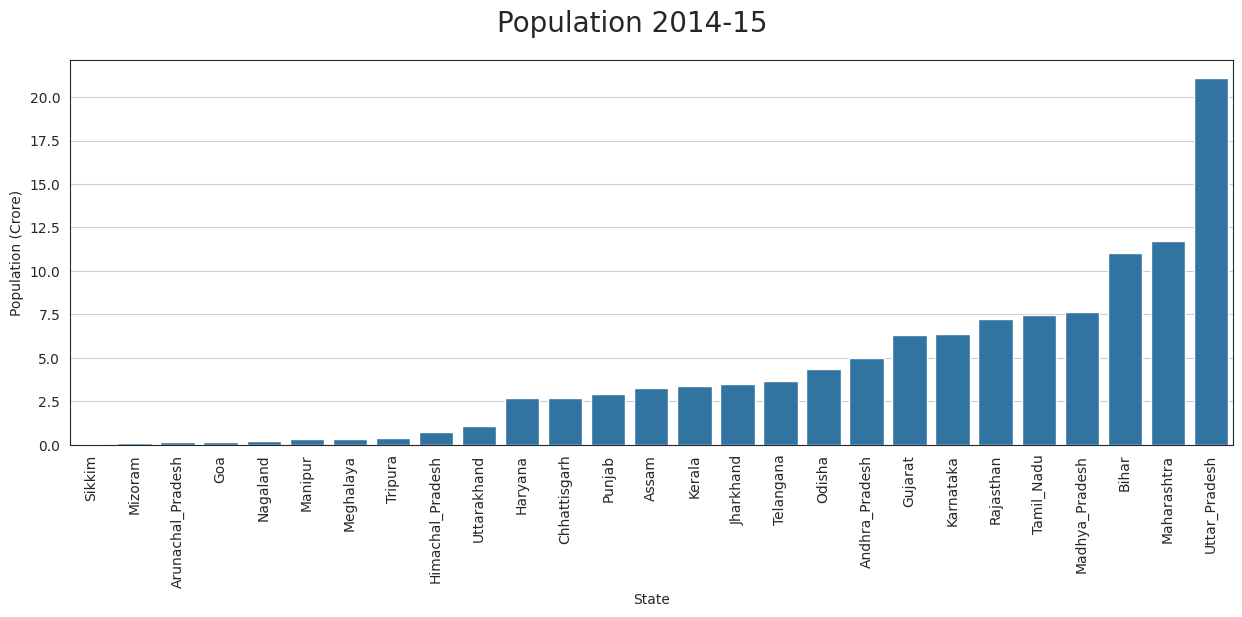

In [137]:
#Plot the Population using a function
PlotThisParam("Population")

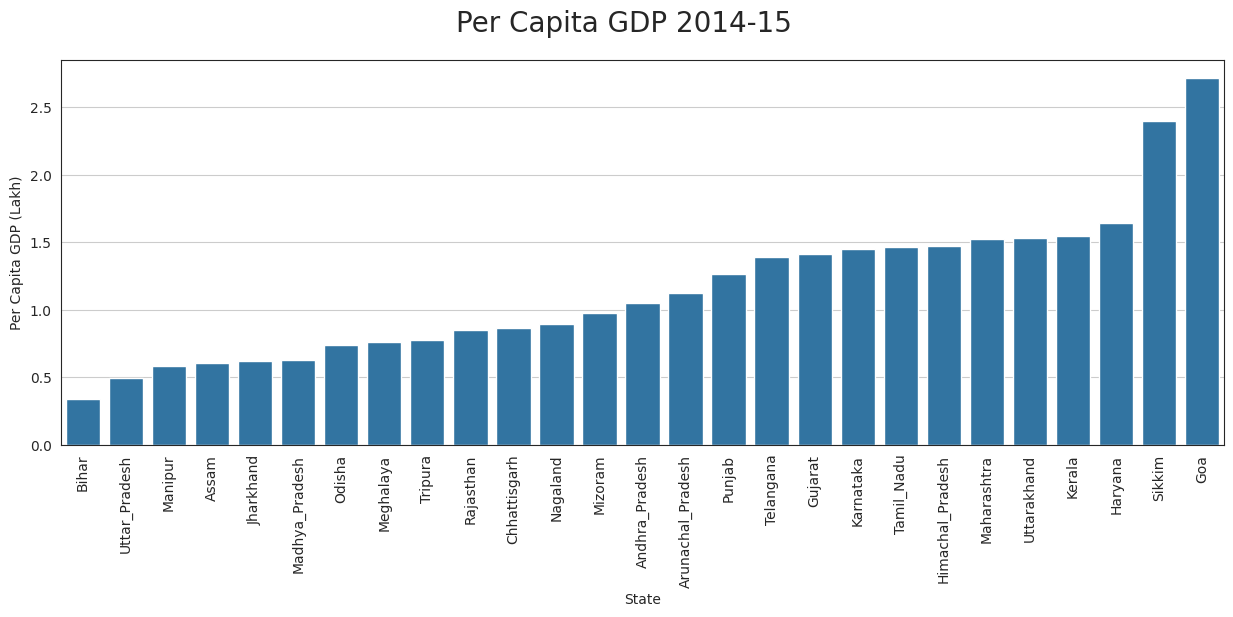

In [138]:
#Plot the Per Capita GDP using a function
PlotThisParam("Per_Capita_GDP")

###### Part 1B: Task 4 : Identify the top-5 and the bottom-5 states based on GDP per capita.

<ipython-input-139-ba06559b57c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1B_Temp.rename(columns={'Amount': 'Per_Capita_GDP'}, inplace=True)


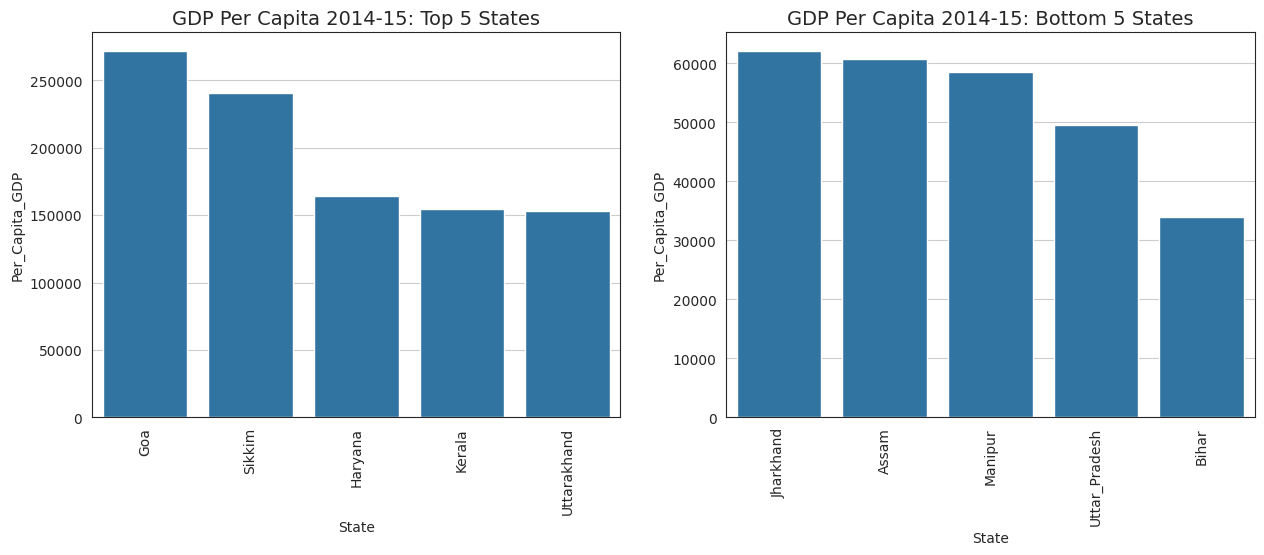

In [139]:
df1B_Temp=df1B_Final3[df1B_Final3['Sno']=='17']#Per Capitcal GDP
df1B_Temp.rename(columns={'Amount': 'Per_Capita_GDP'}, inplace=True)

df1B_Groupby = df1B_Temp.groupby("State")
df1B_Groupby = pd.DataFrame(round(df1B_Groupby["Per_Capita_GDP"].mean().sort_values(ascending=False),2))
df1B_Groupby.reset_index(inplace=True)

plt.figure(figsize=(15,5))

fig= plt.subplot(1,2,1)
ax= plt.gca()

ax.set_title("GDP Per Capita 2014-15: Top 5 States", fontsize=14)
plt.grid()
grid=sns.barplot(x='State',y='Per_Capita_GDP',data=df1B_Groupby.head(5) )

# Rotate the labels on x-axis
for item in grid.get_xticklabels():
    item.set_rotation(90)

######################################################################3
fig = plt.subplot(1,2,2)
ax= plt.gca()
ax.set_title("GDP Per Capita 2014-15: Bottom 5 States", fontsize=14)
plt.grid()
grid=sns.barplot(x='State',y='Per_Capita_GDP',data=df1B_Groupby.tail(5) )
sns.set_style("white")

# Rotate the labels on x-axis
for item in grid.get_xticklabels():
    item.set_rotation(90)

plt.savefig('Top5-Bottom5-GDP-Per-Capita-States-as-per-2014-15.png', dpi=150)

###### Part 1B: Task 5: Find the ratio of highest per capita GDP to the lowest per capita GDP.

In [140]:
maxPercapita= round(df1B_Groupby["Per_Capita_GDP"].max(),2)
minPercapita= round(df1B_Groupby["Per_Capita_GDP"].min(),2)
ratio=round(maxPercapita/minPercapita,2)
print ('Max Per Capita Income is ', maxPercapita)
print ('Min Per Capita Income is ', minPercapita)
print ('Ratio of Max/Min Per Capita Income is', ratio)

Max Per Capita Income is  271793.0
Min Per Capita Income is  33954.0
Ratio of Max/Min Per Capita Income is 8.0


###### Part 1B: Task 6: Plot the percentage contribution of primary, secondary and tertiary sectors as a percentage of total GDP for all the states.

In [141]:
#Preparing data for Plotting GDP Sector %age Contribution Graph
def get_1B_gsdp_sw_Data():
    Cond1= ((df1B_Final3["Sno"]=="Total") | (df1B_Final3["Sno"]=="15") | (df1B_Final3["Sno"]=="12"))
    df1B_Temp= df1B_Final3[Cond1]

    df1B_gsdp_sw =df1B_Temp.pivot_table(index="State",values="Amount", columns="Item", aggfunc="sum")

    df1B_gsdp_sw.rename(columns={"Gross State Domestic Product": "GSDP"}, inplace=True)
    df1B_gsdp_sw.rename(columns={"TOTAL GSVA at basic prices": "Total_GSVA"}, inplace=True)
    df1B_gsdp_sw.rename(columns={"Primary": "Primary_Sec"}, inplace=True)
    df1B_gsdp_sw.rename(columns={"Secondary": "Secondary_Sec"}, inplace=True)
    df1B_gsdp_sw.rename(columns={"Tertiary": "Tertiary_Sec"}, inplace=True)

    df1B_gsdp_sw['Primary%']=round(df1B_gsdp_sw.Primary_Sec/df1B_gsdp_sw.GSDP*100,0)
    df1B_gsdp_sw['Secondary%']=round(df1B_gsdp_sw.Secondary_Sec/df1B_gsdp_sw.GSDP*100,0)
    df1B_gsdp_sw['Tertiary%']=round(df1B_gsdp_sw.Tertiary_Sec/df1B_gsdp_sw.GSDP*100,0)

    df1B_gsdp_sw.sort_values(by=['Secondary%'], ascending=False, inplace=True)

    df1B_gsdp_sw.reset_index(inplace=True)
    df1B_gsdp_sw=df1B_gsdp_sw.loc[:,['State','Primary_Sec','Secondary_Sec','Tertiary_Sec',\
                                     'GSDP','Total_GSVA','Primary%','Secondary%','Tertiary%']]
    return df1B_gsdp_sw

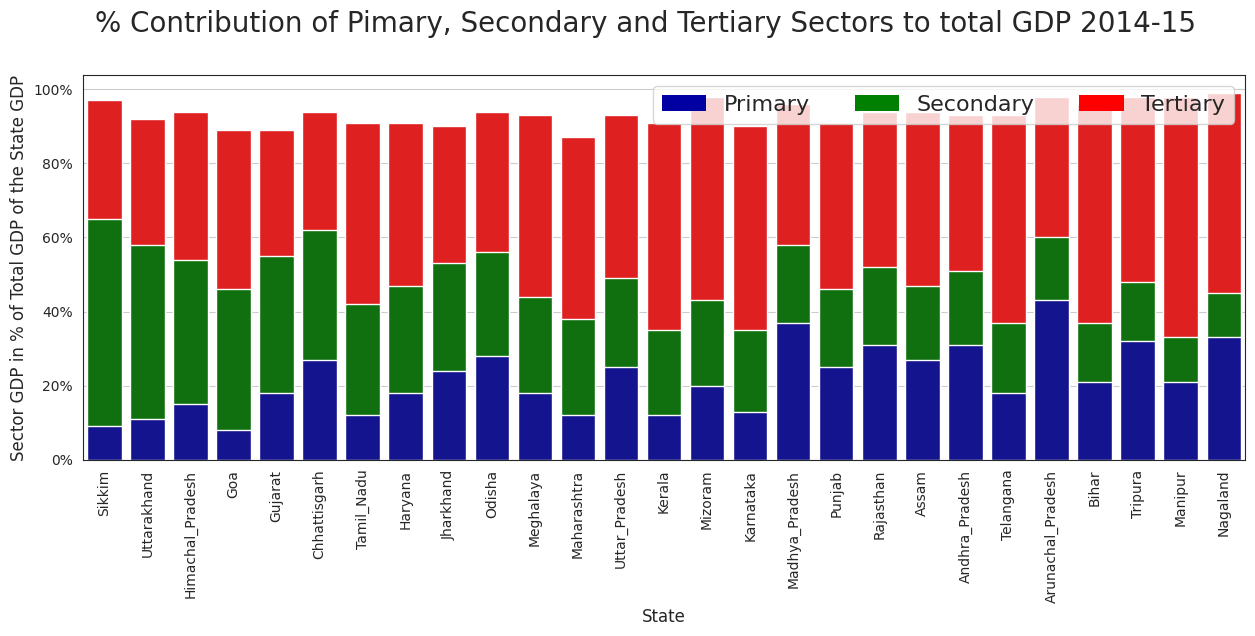

In [142]:
#Plotting GDP Sector %age Contribution Stack BarGraph

#Get the data for plotting purpose
df1B_gsdp_sw = get_1B_gsdp_sw_Data()

fig = plt.figure(figsize=(15,5))
ax= plt.gca()
Title="% Contribution of Pimary, Secondary and Tertiary Sectors to total GDP 2014-15"
fig.suptitle(Title,fontsize=20, y=1.01)

#sns.set_style("white")
sns.set_context({"figure.figsize": (12, 8)})

#Plot 1 - background - "Tertiary" (top) series
plt.grid()
top_plot=sns.barplot(x = df1B_gsdp_sw.State, y = df1B_gsdp_sw['Primary%']+ \
                     df1B_gsdp_sw['Secondary%']+df1B_gsdp_sw['Tertiary%'], color = "red" )



#Plot 2 - overlay - "Secondary" (middle) series
middle_plot = sns.barplot(x = df1B_gsdp_sw.State, y = df1B_gsdp_sw['Primary%']+ \
                          df1B_gsdp_sw['Secondary%'], color = "green")

#Plot 3 - overlay - "Primary" (bottom) series
bottom_plot = sns.barplot(x = df1B_gsdp_sw.State, y = df1B_gsdp_sw['Primary%'], color = "#0000A3")
sns.set_style("white")

topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
middlebar = plt.Rectangle((0,0),1,1,fc="green", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')

l = plt.legend([bottombar, middlebar, topbar], ['Primary','Secondary', 'Tertiary'], loc=1, ncol = 3, prop={'size':16})
l.draw_frame(True)

#Optional code - Make plot look nicer
#sns.despine(left=True)

ax.set_ylabel("Sector GDP in % of Total GDP of the State GDP")
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter())

ax.xaxis.label.set_fontsize(12)
ax.yaxis.label.set_fontsize(12)

for item in bottom_plot.get_yticklabels() :
    item.set_fontsize(10)

for item in bottom_plot.get_xticklabels() :
    item.set_fontsize(10)
    item.set_rotation(90)

plt.savefig('%Contribution-of-Pimary-Secondary-Tertiary-Sectors-to-GDP-2014-15.png', dpi=150)

In [143]:
#Merge 1A & 1B Datasets for analysis. To analyse the relationship between Population, GDP, Per_Capita GDP, Growth Rate
df1A1=df1A_Final[ (df1A_Final.Type=='Growth%') & (df1A_Final.Duration=='2014-15')]

df1A1=df1A1.loc[:,['State','Amount']]
df1A1.rename(columns={'Amount': 'Growth%'}, inplace=True)
#df1A1['Growth%']=df1A1['Growth%']

df1B_pop=get_df1B_data('Population')
df1B_pop=df1B_pop.loc[:,['State','Population']]
#df1B_pop['Population'] = df1B_pop1['Population']

df1B_gsdp=get_df1B_data('GSDP')
df1B_gsdp=df1B_gsdp.loc[:,['State','GSDP']]
#df1B_gsdp['GSDP']=df1B_gsdp1['GSDP']

df1B_PCgdp=get_df1B_data('Per_Capita_GDP')
df1B_PCgdp=df1B_PCgdp.loc[:,['State','Per_Capita_GDP']]
#df1B_PCgdp['Per_Capita_GDP']=df1B_PCgdp1['Per_Capita_GDP']

df1B_1A = df1B_pop.merge(df1B_gsdp, how="inner", on="State")
df1B_1A = df1B_1A.merge(df1B_PCgdp, how="inner", on="State")
df1B_1A = df1B_1A.merge(df1A1, how="inner", on="State")

df1B_1A.sort_values(by=['GSDP'], ascending=False, inplace=True)

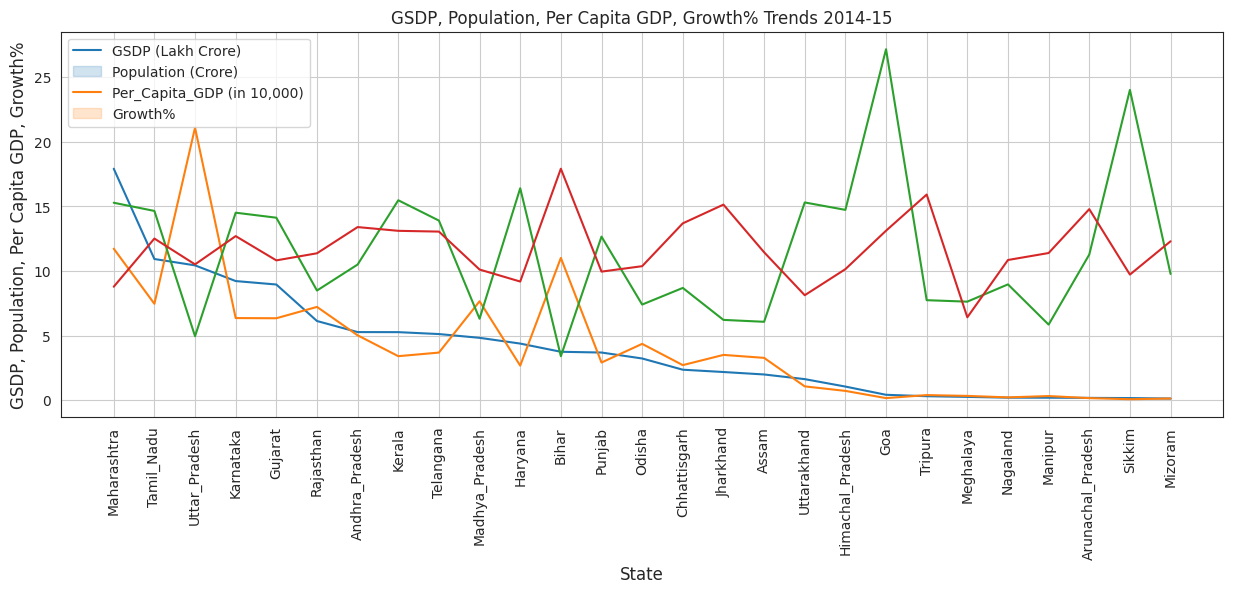

In [144]:
#Plot a Relationship between Population, GDP, Per_Capita GDP, GDP Growth%
fig= plt.figure(figsize=(15,5))
plt.title("GSDP, Population, Per Capita GDP, Growth% Trends 2014-15")

sns.lineplot(x=df1B_1A.State, y=df1B_1A.GSDP)
sns.lineplot(x=df1B_1A.State, y=df1B_1A.Population)
sns.lineplot(x=df1B_1A.State, y=df1B_1A.Per_Capita_GDP*10)
sns.lineplot(x=df1B_1A.State, y=df1B_1A['Growth%'])
sns.set_style("white")

ax = plt.gca()

ax.legend(['GSDP (Lakh Crore)', 'Population (Crore)',  \
           'Per_Capita_GDP (in 10,000)','Growth%'], loc='upper left')
plt.ylabel("GSDP, Population, Per Capita GDP, Growth%")

plt.grid()
ax.xaxis.label.set_fontsize(12)
ax.yaxis.label.set_fontsize(12)

for item in ax.get_xticklabels() :
    item.set_fontsize(10)
    item.set_rotation(90)

for item in ax.get_yticklabels() :
    item.set_fontsize(10)


###### Part 1B: Task 7: Categorise the states into four categories based on GDP per capita (C1, C2, C3, C4 - C1 would have the highest per capita GDP, C4 the lowest). The quantile values are (0.20,0.5, 0.85, 1),

In [145]:
#Select Per Capital GDP Records from Dataframe to create bin

df1B_Temp  =  df1B_Final3[ df1B_Final3['Sno']=='17']#Per Capitcal GDP
df1B_Temp.rename(columns={'Amount': 'Per Capita GDP'}, inplace=True)
df1B_Temp.sort_values('Per Capita GDP', ascending=True, inplace=True)

L=len(df1B_Temp)
index=list(range(1,L+1))
df1B_Temp['Index']=index

#Define bin size values in term of percentile
bins=[0,int(L*.20) , int(L*.5), int(L*.85), L]

Categories=['C4','C3','C2','C1']

#A New 'Category' column is created in df1B_Temp which has category as per the 'bins' conditions
df1B_Temp['Category']= pd.cut(df1B_Temp['Index'],bins,labels=Categories)

C1 = list(df1B_Temp[ df1B_Temp['Category']=='C1'] .State)
C2 = list(df1B_Temp[ df1B_Temp['Category']=='C2'] .State)
C3 = list(df1B_Temp[ df1B_Temp['Category']=='C3'] .State)
C4 = list(df1B_Temp[ df1B_Temp['Category']=='C4'] .State)

#Create a dataframe which has only states and category. I need this in future to merge with
#1A or 2 to perform the analysis
dfCategory=df1B_Temp[['State','Category']]

<ipython-input-145-0de59d23d0e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1B_Temp.rename(columns={'Amount': 'Per Capita GDP'}, inplace=True)
<ipython-input-145-0de59d23d0e5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1B_Temp.sort_values('Per Capita GDP', ascending=True, inplace=True)
<ipython-input-145-0de59d23d0e5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [146]:
print ("These subcategories of the states created based on the Given Perentile of Per Capita GDP as of 2014-15\n")
print ("C1 Category States: "+", ".join(C1) + "\n")
print ("C2 Category States: "+", ".join(C2) + "\n")
print ("C3 Category States: "+", ".join(C3) + "\n")
print ("C4 Category States: "+", ".join(C4) + "\n")

These subcategories of the states created based on the Given Perentile of Per Capita GDP as of 2014-15

C1 Category States: Uttarakhand, Kerala, Haryana, Sikkim, Goa

C2 Category States: Andhra_Pradesh, Andhra_Pradesh, Arunachal_Pradesh, Punjab, Telangana, Gujarat, Karnataka, Tamil_Nadu, Himachal_Pradesh, Maharashtra

C3 Category States: Odisha, Meghalaya, Tripura, Rajasthan, Chhattisgarh, Nagaland, Mizoram, Andhra_Pradesh, Andhra_Pradesh

C4 Category States: Bihar, Uttar_Pradesh, Manipur, Assam, Jharkhand, Madhya_Pradesh



###### Part 1B: Task 9: Plot the contribution of the sub-sectors as a percentage of the GSDP of each category.

In [147]:
#Create a Dataframe which has all 1B data with Category
df1B_Temp_cat=df1B_Temp[['State','Category']]
df1B_Final4 = df1B_Final3.merge(df1B_Temp_cat, how="inner",on="State")
df1B_Final4.rename(columns={'Item':'SubSector'}, inplace=True)

#Dataframe containing 1B data without UT but this contains Category information for each state is ready for analysis.

In [148]:
#To avoid duplicate counting we need to remove summary records.
#Create categorywise dataframe in dict

excludeList = ['1','6','7','12','13','14','15','16','17','Total']

Cond1 = ( ~df1B_Final4.Sno.isin(excludeList) )

Categories = ['C1','C2','C3','C4']
SubSector_Rep ={}
for Category in Categories:
    Cond2 = (df1B_Final4.Category==Category)
    df1B_Final5 = df1B_Final4[ (Cond1 & Cond2) ]

    df1B_Final5['Percent'] = round(100*df1B_Final5.Amount/df1B_Final5.Amount.sum(),2)
    df1B_Final5_GroupBy = df1B_Final5.groupby('SubSector')

    SubSector_Rep[Category]= pd.DataFrame( \
        df1B_Final5_GroupBy.Percent.sum().sort_values(ascending=False) )

    SubSector_Rep[Category].reset_index(inplace=True)

# SubSector_Rep (SubSector Report is a dictionary wich has 4 keys C1, C2, C3, C4 and each each is indpendent dataframe)

<ipython-input-148-4b20c0cbebf7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1B_Final5['Percent'] = round(100*df1B_Final5.Amount/df1B_Final5.Amount.sum(),2)
<ipython-input-148-4b20c0cbebf7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1B_Final5['Percent'] = round(100*df1B_Final5.Amount/df1B_Final5.Amount.sum(),2)
<ipython-input-148-4b20c0cbebf7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [149]:
# Create a function to generate all Categorywise Plots
def CreateCategorywisePlot(condition):
    font={'family': 'serif','color': 'darkred','weight': 'bold','size': 20}
    Categories = ['C1','C2','C3','C4']
    fig=plt.figure(figsize=(15,15))

    if condition=="80":
        Title = "Sub-sectors Contributing approx 80% of GDP: 2014-15"
    elif condition=="20":
        Title = "Sub-sectors Contributing approx 20% of GDP: 2014-15"
    else:
        Title = "% Contribution of the Sub-sectors to GSDP for each category: 2014-15"

    fig.suptitle(Title, fontsize=20, y=1.02)
    n=1
    for Category in Categories:
        df = SubSector_Rep[Category]
        df.index = df.SubSector
        if condition=="80":
             df= df[ (df.cumPercentage <= 80) ]
        elif condition=="20":
             df= df[~ (df.cumPercentage <= 80) ]

        df["cumPercentage"] = df["Percent"].cumsum()/df["Percent"].sum()*100

        fig= plt.subplot(2,2,n) #plt.subplots()
        ax = plt.gca()
        ax2 = ax.twinx()
        n+=1

        plt.grid()

        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        xticks = mtick.FormatStrFormatter(fmt)

        ax.bar(df.index, df["Percent"], color="C0")
        ax.yaxis.set_major_formatter(xticks)
        ax.tick_params(axis="y", colors="C0")

        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + \
                     ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(12)
            item.set_rotation(90)

        ax2.plot(df.index, df["cumPercentage"], color="b", marker="^", ms=7)
        ax2.yaxis.set_major_formatter(xticks)
        ax2.yaxis.font=12
        ax2.set_title("Category "+Category + " Sub-Sectors",fontdict=font)
        ax2.tick_params(axis="y", colors="b")

        for item in ([ ax2.xaxis.label, ax2.yaxis.label] + \
                     ax2.get_xticklabels() + ax2.get_yticklabels()):
            item.set_fontsize(12)
            item.set_rotation(90)

    plt.tight_layout()

    if condition=="80":
        plt.savefig('SubSectors-Contributing-Approx80%of-GDP-2014-15.png', dpi=150)
    elif condition=="20":
        plt.savefig('SubSectors-Contributing-Approx20%of-GDP-2014-15.png', dpi=150)
    else:
        plt.savefig('%Contribution-of-SubSectors-in-Different-Categories-in-2014-15.png', dpi=150)

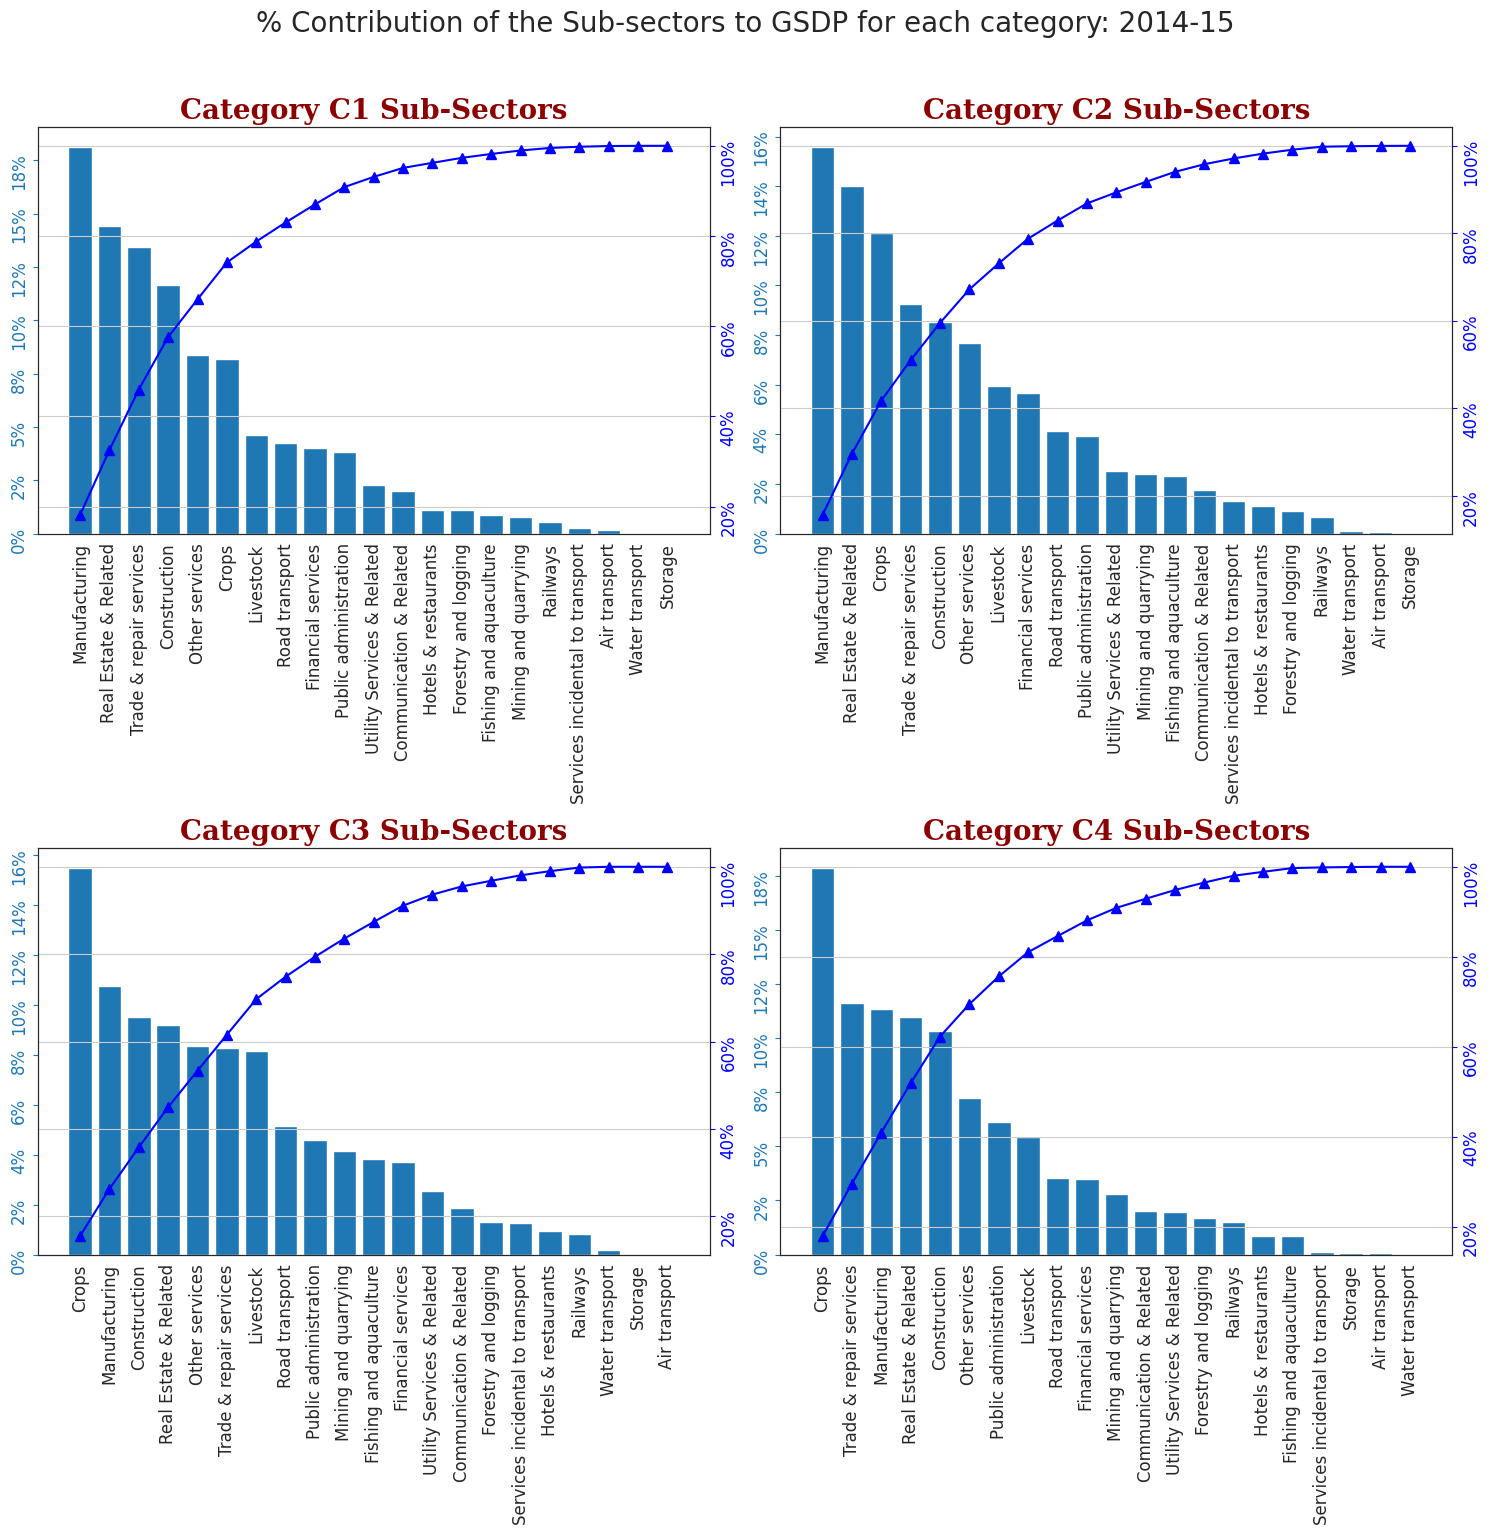

In [150]:
CreateCategorywisePlot("All")

<ipython-input-149-35bd1c8f4e14>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cumPercentage"] = df["Percent"].cumsum()/df["Percent"].sum()*100


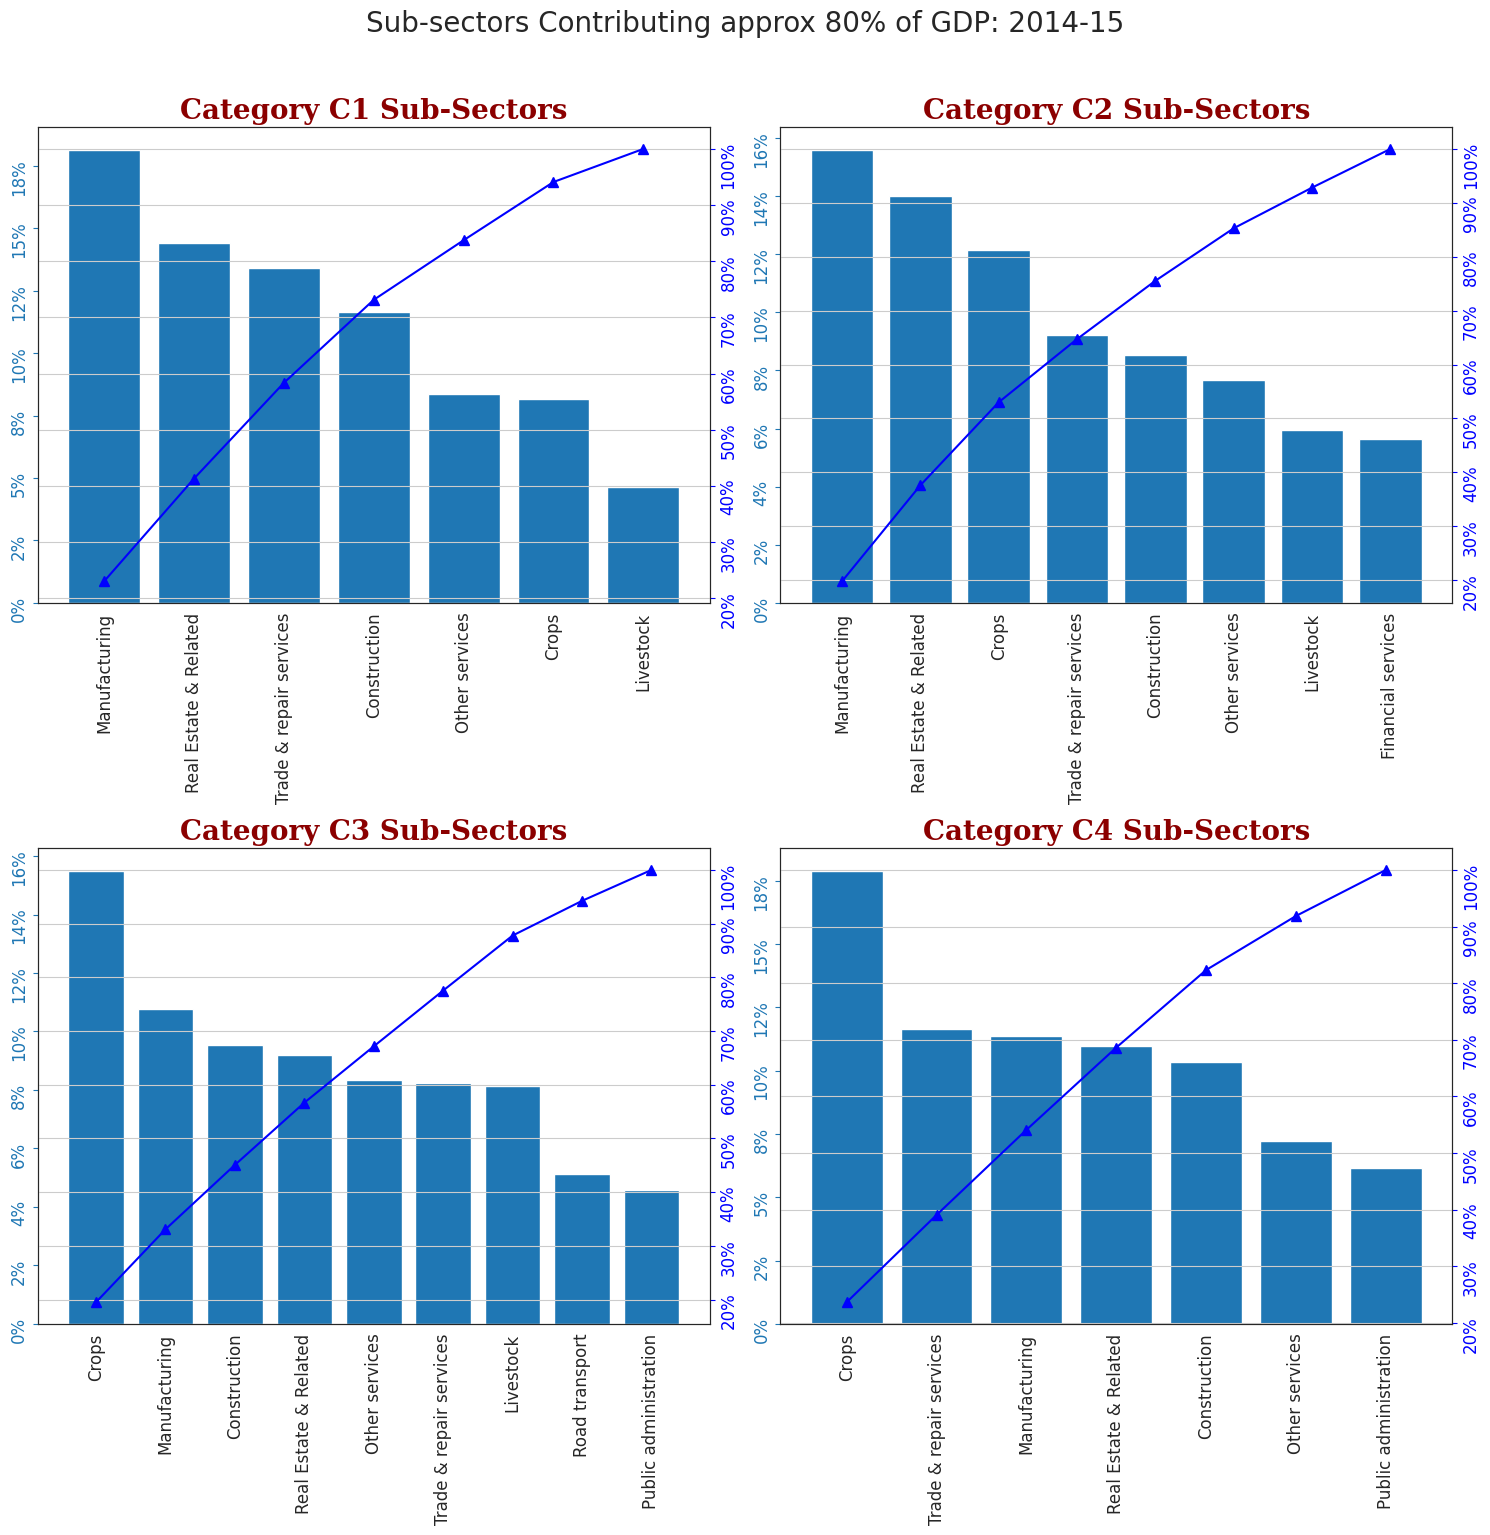

In [151]:
CreateCategorywisePlot("80")

<ipython-input-149-35bd1c8f4e14>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cumPercentage"] = df["Percent"].cumsum()/df["Percent"].sum()*100


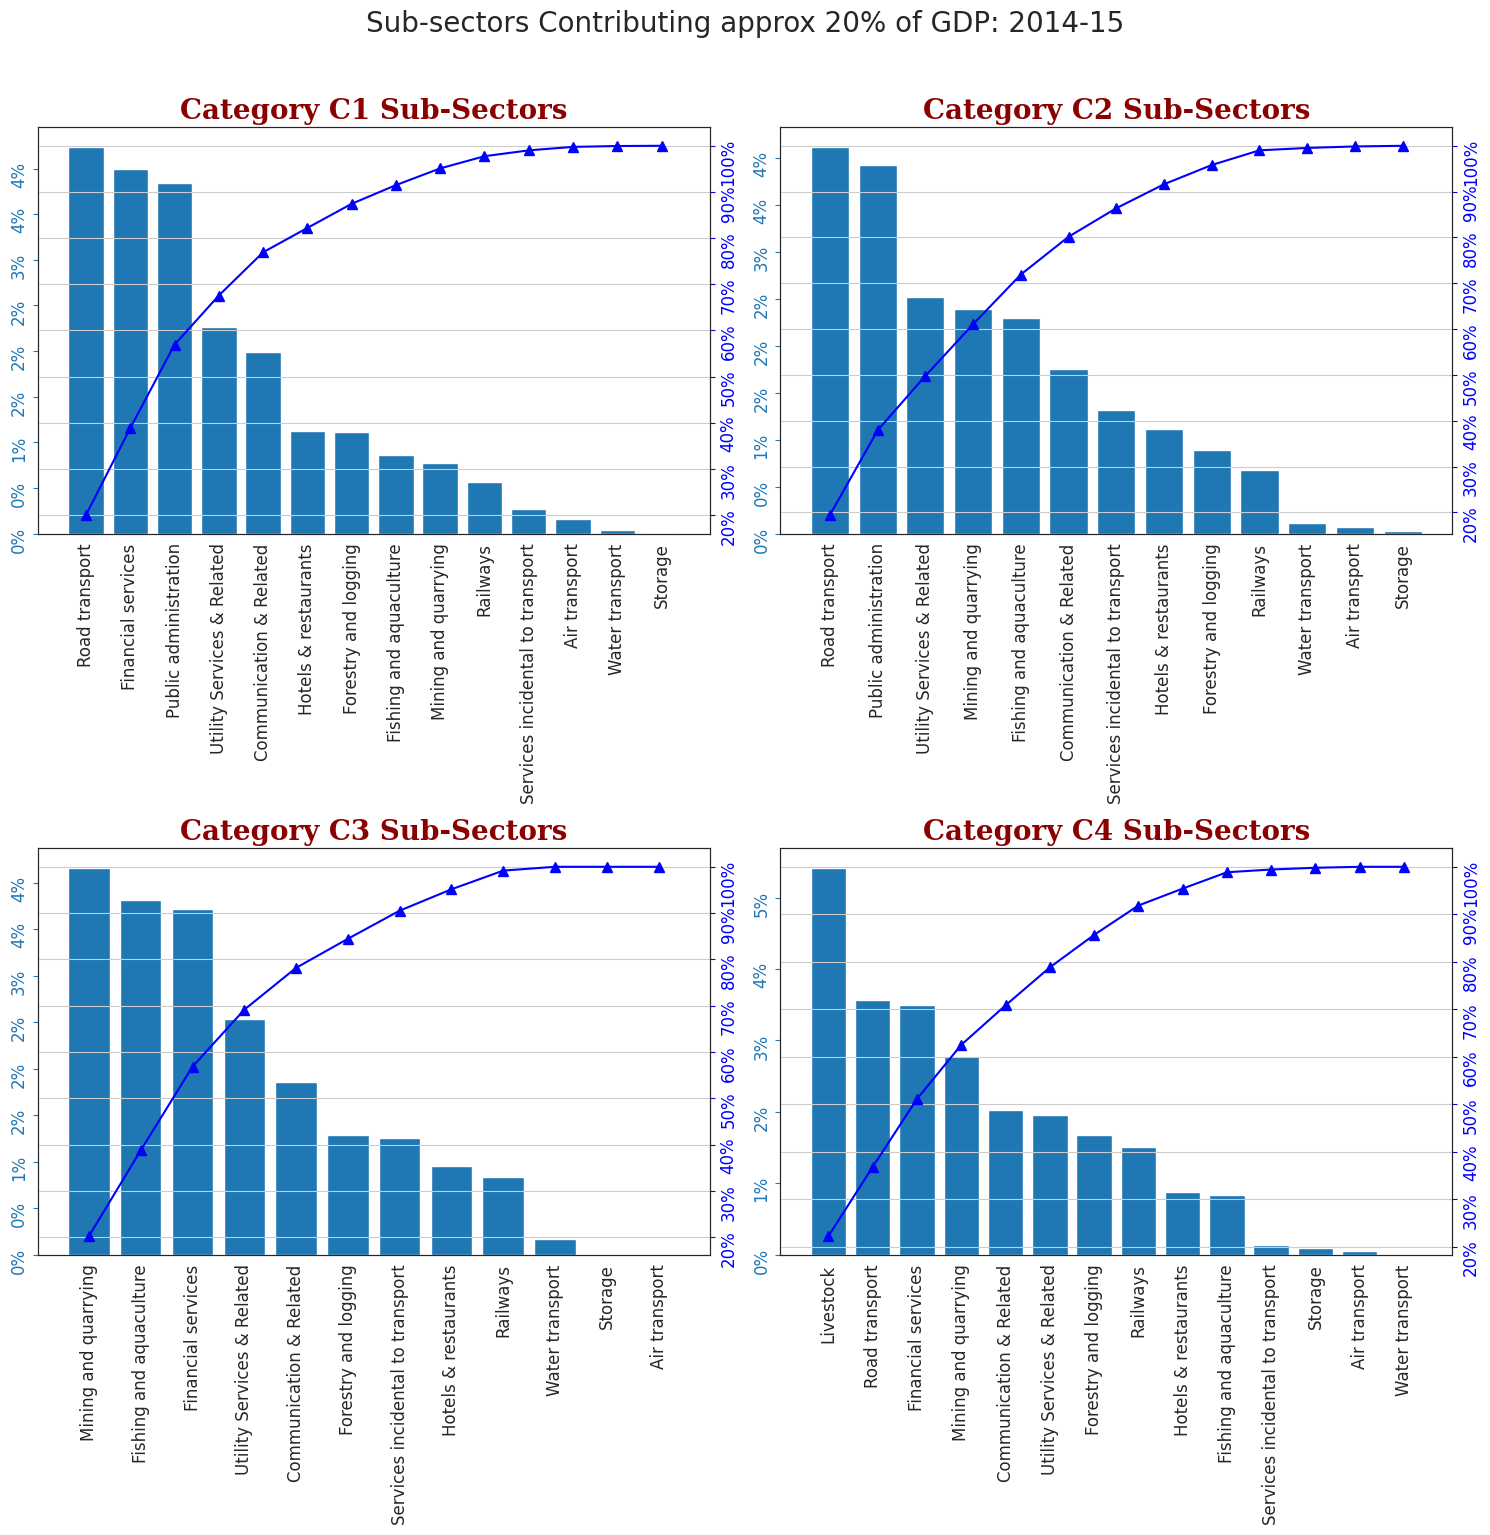

In [152]:
CreateCategorywisePlot("20")

In [153]:
#Function to create plot for multiple sectors
def plotGDP_toSector(Sno, SectorName):
    df1B_Final4_Sector = df1B_Final4[df1B_Final4.Sno==Sno].sort_values('Amount', ascending=False)
    df1B_Final4_Sector = df1B_Final4_Sector.loc[:,['State','Amount','Category']]
    df1B_Final4_Sector["Percent"] =  df1B_Final4_Sector["Amount"]/ df1B_Final4_Sector["Amount"].sum()*100
    df1B_Final4_Sector["cumPercentage"] = df1B_Final4_Sector["Percent"].cumsum()/df1B_Final4_Sector["Percent"].sum()*100
    fig= plt.figure(figsize=(15,5))
    fig.suptitle('GDP from ' +SectorName+ ' : 2014-15', fontsize=20)

    fig= plt.subplot(111) #plt.subplots()
    ax = plt.gca()
    ax2 = ax.twinx()

    fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
    xticks = mtick.FormatStrFormatter(fmt)

    ax.bar(df1B_Final4_Sector.State, df1B_Final4_Sector["Percent"], color="C0")
    ax.yaxis.set_major_formatter(xticks)
    ax.tick_params(axis="y", colors="C0")

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + \
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(12)
        item.set_rotation(90)

    ax2.plot(df1B_Final4_Sector.State, df1B_Final4_Sector["cumPercentage"], color="b", marker="^", ms=7)
    ax2.yaxis.set_major_formatter(xticks)
    #ax2.yaxis.font=12
    #ax2.set_title("Category "+Category + " Sub-Sectors",fontdict=font)
    ax2.tick_params(axis="y", colors="b")

    for item in ([ ax2.xaxis.label, ax2.yaxis.label] + \
                 ax2.get_xticklabels() + ax2.get_yticklabels()):
        item.set_fontsize(12)
        item.set_rotation(90)


    # Rotate the labels on x-axis
    for item in ax.get_xticklabels():
        item.set_rotation(90)

    plt.savefig('GDP-from-'+SectorName+'-2014-15.png', dpi=150)

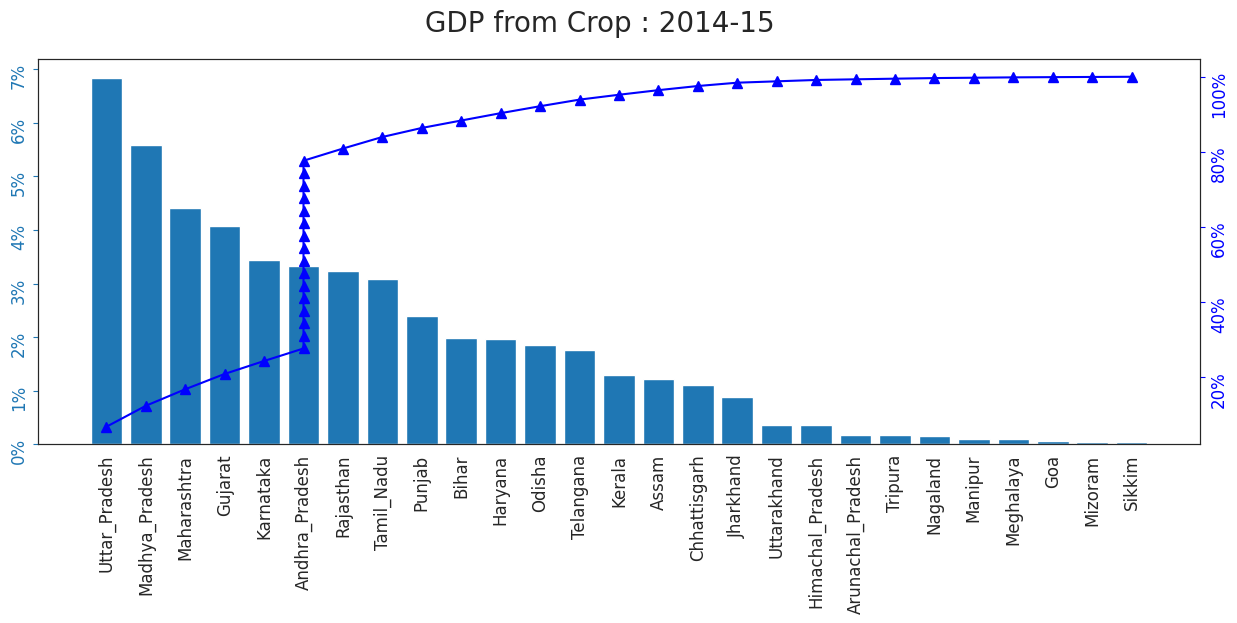

In [154]:
#Plot Crop GDP for All the States
plotGDP_toSector('1.1','Crop')

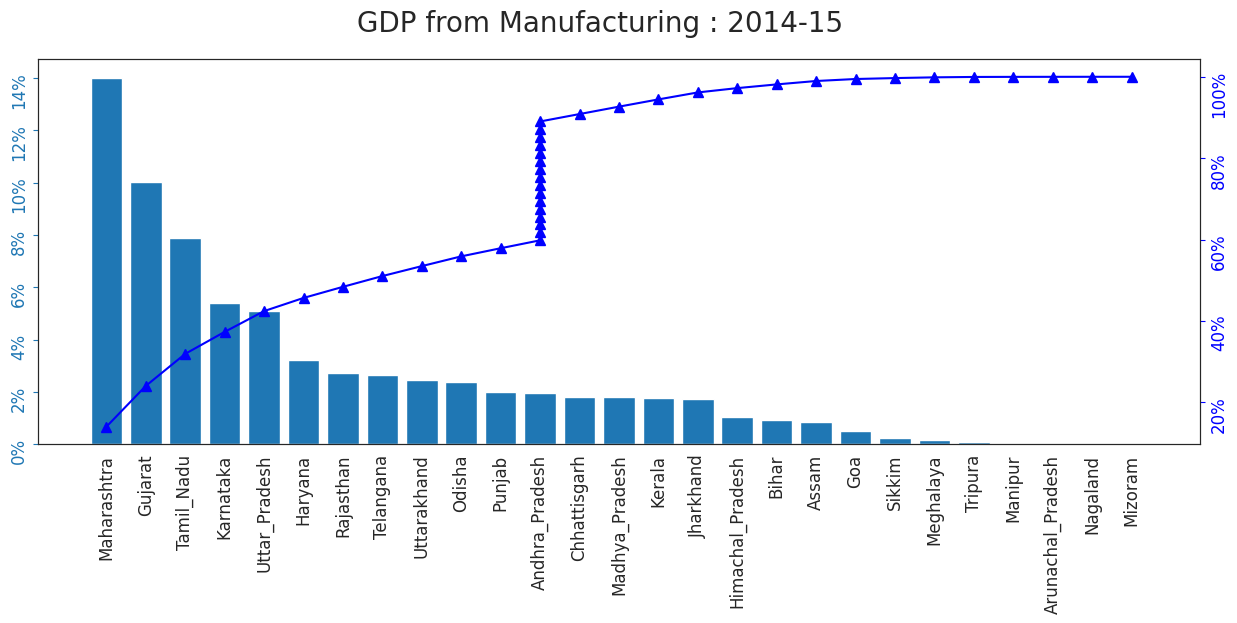

In [155]:
#Plot Manufactring GDP for All the States
plotGDP_toSector('3','Manufacturing')

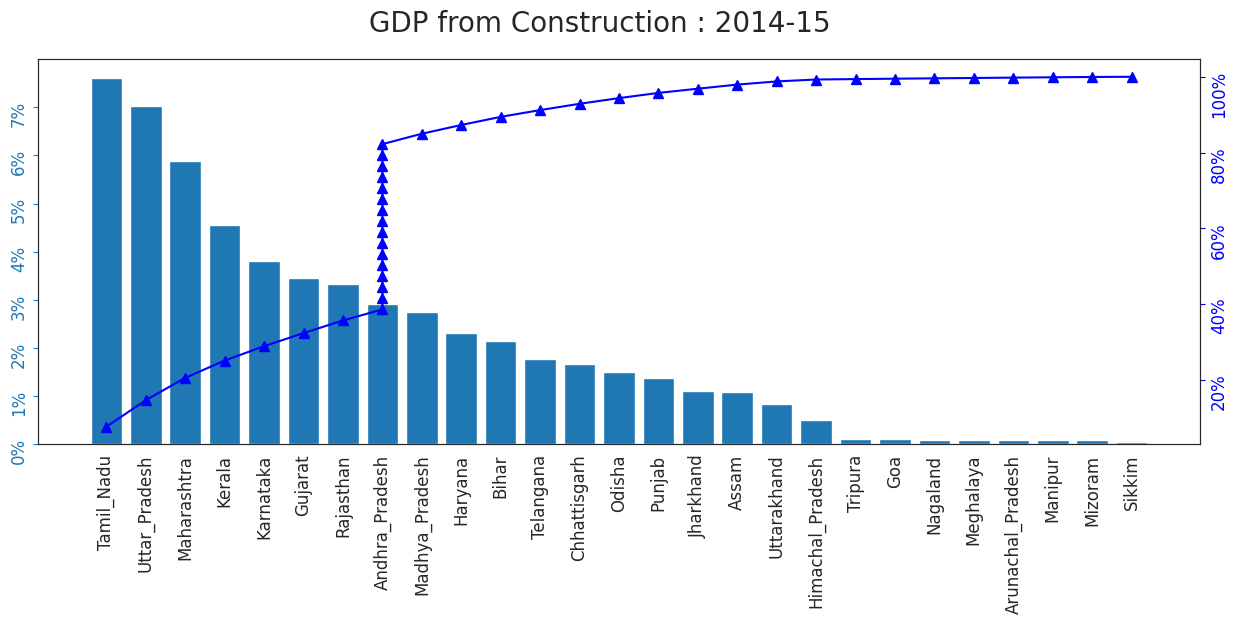

In [156]:
#Plot Construction GDP for All the States
plotGDP_toSector('5','Construction')

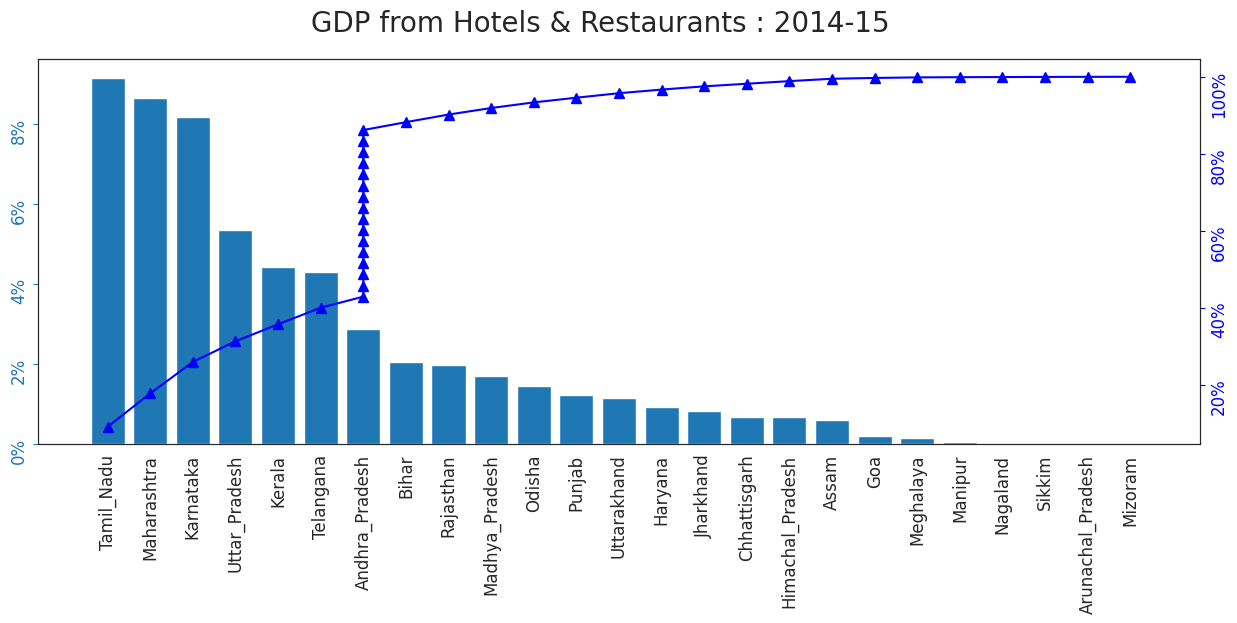

In [157]:
#Plot Hotels & Restaurants GDP for All the States
plotGDP_toSector('6.2','Hotels & Restaurants')

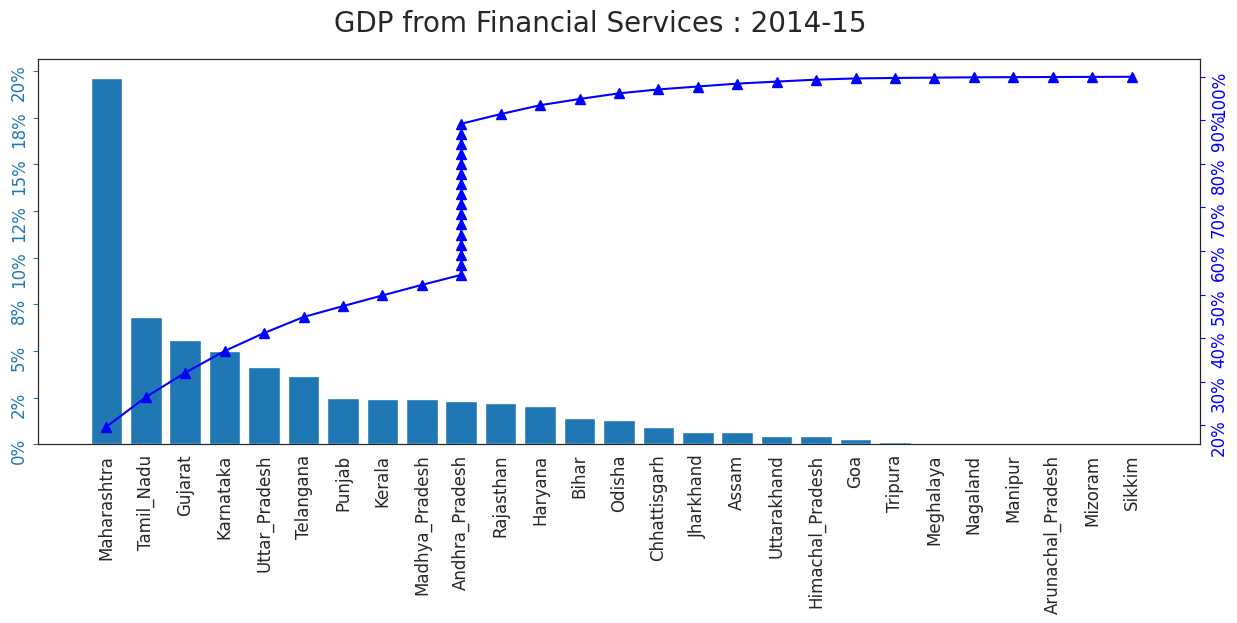

In [158]:
#Plot Financial Services GDP for All the States
plotGDP_toSector('8','Financial Services')

In [159]:
#This function provides the data for Categorwise Analysis of multiple paramets like Growth%, Taxes, Subsidy,
#GSDP, PCGDP, Population

def getData_CategoryAgainstX(Param):
    if Param != "Growth%":
        df1B_groupby = df1B_Final4.groupby(["Category","Sno"])
        df1B_Cat = df1B_groupby.Amount.mean()
        df1B_Cat = pd.DataFrame(df1B_Cat)
        df1B_Cat.reset_index(inplace=True)

    if Param=="Taxes":
        df1B_Cat = df1B_Cat[ df1B_Cat.Sno=="13"] # Taxes
        df1B_Cat.rename(columns = {"Amount":"Taxes (Lakhs)"}, inplace=True)
        df1B_Cat["Taxes (Lakhs)"] = df1B_Cat["Taxes (Lakhs)"] /100000
        Param = "Taxes (Lakhs)"
    elif Param=="Subsidy":
        df1B_Cat = df1B_Cat[ df1B_Cat.Sno=="14"] # Subsidy
        df1B_Cat.rename(columns = {"Amount":"Subsidy (Lakhs)"}, inplace=True)
        df1B_Cat["Subsidy (Lakhs)"] = df1B_Cat["Subsidy (Lakhs)"] /100000
        Param = "Subsidy (Lakhs)"
    elif Param=="GSDP":
        df1B_Cat = df1B_Cat[ df1B_Cat.Sno=="15"] # GSDP
        df1B_Cat.rename(columns = {"Amount":"GSDP (Lakhs)"}, inplace=True)
        df1B_Cat["GSDP (Lakhs)"] = df1B_Cat["GSDP (Lakhs)"]/100000
        Param="GSDP (Lakhs)"
    elif Param=="Population":
        df1B_Cat = df1B_Cat[ df1B_Cat.Sno=="16"] # GSDP
        df1B_Cat.rename(columns = {"Amount":"Population (Lakhs)"}, inplace=True)
        df1B_Cat["Population (Lakhs)"] = df1B_Cat["Population (Lakhs)"]/100000
        Param="Population (Lakhs)"
    elif Param=="PCGDP":
        df1B_Cat = df1B_Cat[ df1B_Cat.Sno=="17"] # Subsidy
        df1B_Cat.rename(columns = {"Amount":"PCGDP (Lakhs)"}, inplace=True)
        df1B_Cat["PCGDP (Lakhs)"] = df1B_Cat["PCGDP (Lakhs)"]/100000
        Param="PCGDP (Lakhs)"
    elif Param=="Growth%":
        df1A_Temp= df1A_Final.loc[ (df1A_Final.Type=="Growth%") & (df1A_Final.Duration=="2014-15") ].loc [:,['State','Amount']]
        df1A_Temp.rename(columns = {"Amount":"Growth%"}, inplace=True)
        df1B_Cat = df1A_Temp.merge(dfCategory, how="inner", on="State")

    return df1B_Cat

<ipython-input-159-4bcd7ea7ccc9>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1B_groupby = df1B_Final4.groupby(["Category","Sno"])
<ipython-input-159-4bcd7ea7ccc9>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1B_groupby = df1B_Final4.groupby(["Category","Sno"])
<ipython-input-159-4bcd7ea7ccc9>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1B_groupby = df1B_Final4.groupby(["Category","Sno"])
<ipython-inpu

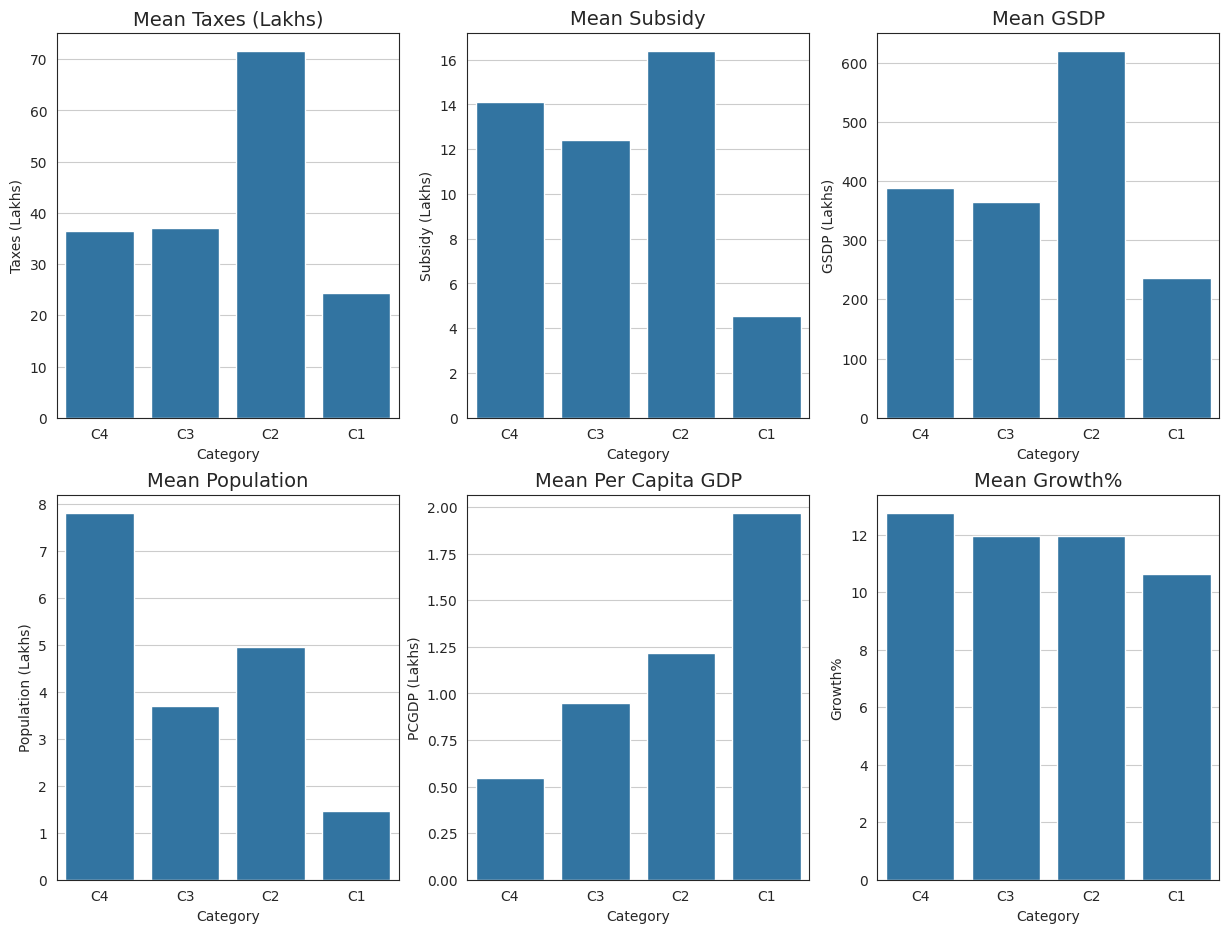

In [160]:
#Plot Growth%, Taxes, Subsidy, #GSDP, PCGDP, Population for all sectors

font={'family': 'serif','color': 'darkred','weight': 'bold','size': 12}
df_Taxes      =getData_CategoryAgainstX("Taxes")
df_Subsidy    =getData_CategoryAgainstX("Subsidy")
df_GSDP       =getData_CategoryAgainstX("GSDP")
df_Population =getData_CategoryAgainstX("Population")
df_PCGDP      =getData_CategoryAgainstX("PCGDP")
df_Growth     =getData_CategoryAgainstX("Growth%")

plt.figure(figsize=(15,35))

plt.subplot(6,3,1)
plt.grid()
ax= plt.gca()
ax.set_title("Mean Taxes (Lakhs)", fontsize=14)
sns.barplot(data=df_Taxes, y="Taxes (Lakhs)",x="Category", ci=None)
sns.set_style("white")

plt.subplot(6,3,2)
plt.grid()
ax= plt.gca()
ax.set_title("Mean Subsidy", fontsize=14)
sns.barplot(data=df_Subsidy, y="Subsidy (Lakhs)",x="Category", ci=None)
sns.set_style("white")

plt.subplot(6,3,3)
plt.grid()
ax= plt.gca()
ax.set_title("Mean GSDP", fontsize=14)
sns.barplot(data=df_GSDP, y="GSDP (Lakhs)",x="Category", ci=None)
sns.set_style("white")

plt.subplot(6,3,4)
plt.grid()
ax= plt.gca()
ax.set_title("Mean Population", fontsize=14)
sns.barplot(data=df_Population, y="Population (Lakhs)",x="Category", ci=None)
sns.set_style("white")

plt.subplot(6,3,5)
plt.grid()
ax= plt.gca()
ax.set_title("Mean Per Capita GDP", fontsize=14)
sns.barplot(data=df_PCGDP, y="PCGDP (Lakhs)",x="Category", ci=None)
sns.set_style("white")

plt.subplot(6,3,6)
plt.grid()
ax= plt.gca()
ax.set_title("Mean Growth%", fontsize=14)
sns.barplot(data=df_Growth, y="Growth%",x="Category", ci=None)
sns.set_style("white")


###### Part 1B: Task 10: Now that you have summarised the data in the form of plots, tables etc., try to observe non-obvious insights from it. This Work is part of Presentation

##### Part 1B: Task 11: Ask other such relevant questions which you think are important and write your insights for category separately.  This Work is part of Presentation

###### Part 1B: Task 12: Finally, provide at least two recommendations for each category to improve the per capita GDP.  This Work is part of Presentation

# Part II : GDP and Education Drop-out Rates

In [161]:
#Creating df2 dataset
downloadfile = url + "Data-II-Download.csv"

!wget {downloadfile}

df2=pd.read_csv("Data-II-Download.csv")

--2024-11-10 14:09:10--  https://raw.githubusercontent.com/dasarpai/DAI-Projects/main/Economics/Economy-Analysis/data/Data-II-Download.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2996 (2.9K) [text/plain]
Saving to: ‘Data-II-Download.csv’

Data-II-Download.cs 100%[===================>]   2.93K  --.-KB/s    in 0s      

2024-11-10 14:09:10 (39.1 MB/s) - ‘Data-II-Download.csv’ saved [2996/2996]



In [162]:
# Analysing df2 dataset
#df2.head(5)

#Only 3 year's education dropout data is available 2012-13, 13,-14 & 14-15

#Renaming columns. There is one col in org dataset which has duplicate name.
#Other names are too long with unnecessary spaces

df2=df2.rename(columns = {'Level of Education - State':'State',
                          'Primary - 2012-2013': 'Primary:2012-13',
                          'Primary - 2014-2015': 'Primary:2013-14',
                          'Primary - 2014-2015.1': 'Primary:2014-15',
                          'Upper Primary - 2012-2013': 'Upper Primary:2012-13',
                          'Upper Primary - 2013-2014': 'Upper Primary:2013-14',
                          'Upper Primary - 2014-2015':  'Upper Primary:2014-15',
                          'Secondary - 2012-2013': 'Secondary:2012-13',
                          'Secondary - 2013-2014': 'Secondary:2013-14',
                          'Secondary - 2014-2015': 'Secondary:2014-15',
                          'Senior Secondary - 2012-2013':  'Senior Secondary:2012-13',
                          'Senior Secondary - 2013-2014': 'Senior Secondary:2013-14',
                          'Senior Secondary - 2014-2015': 'Senior Secondary:2014-15' })

df2=df2.drop(['Sl. No.'],axis=1)

# Remove records for All India
df2=df2[df2['State']!='All India']
df2['State']=df2['State'].str.replace(" ","_")


#To Match the name of state in Education and GDP Dataframe
df2.replace({'State': {'A_&_N_Islands': 'Andaman_&_Nicobar'}}, inplace=True)
df2.replace({'State': {'Chhatisgarh': 'Chhattisgarh'}}, inplace=True)

# There is different spelling of this state in this file so standardize this.


In [188]:
# Transform data for analysis purpose
# Step 1 of Data Tranformation
Durations=['2012-13','2013-14','2014-15']
EduLevels=['Primary','Upper Primary','Secondary','Senior Secondary']

First=True
States=df2['State']
for Duration in Durations:
    DurCol=[Duration]*len(States)
    for EduLevel in EduLevels:
        EduCol=[EduLevel]*len(States)
        Data=df2[EduLevel+":"+Duration]

        EduData=list(zip(States,DurCol,EduCol,Data))

        if First:
            df2_Final=pd.DataFrame(EduData)
            First=False
        else:
            pd.concat([df2_Final, pd.DataFrame(EduData)], ignore_index=True)

df2_Final.columns=['State','Duration','EduLevel','DropOutRate']

#Null Treatment
# For any given state and any EduLevel if dropout rate is null for a particular year then
# get the mean from other years records of the same state and same edu level
for State in States:
    for EduLevel in EduLevels:
        # To get the dropout rate of same state and same Edulevel from other years
        Cond1= (df2_Final.State==State) & (df2_Final.EduLevel==EduLevel)
        Mean = round(df2_Final[Cond1].DropOutRate.mean(),2)

        # To count the records of dropout rate of the same state and same Edulevel from other years
        Cond2= (df2_Final.State==State) & (df2_Final.EduLevel==EduLevel) & (df2_Final.DropOutRate.isnull())
        NaNCount=np.isnan(df2_Final[Cond2].DropOutRate).sum()

        #print (State, EduLevel, NaNCount,Mean) #for debugging purpose

        if NaNCount>0: #if Some records has null value for this state & EduLevel
            if not np.isnan(Mean):
                # Mean of DropOutRate of this state & Edulevel is not null,
                # it mean from some other years of the same state & eduLevel this info is available
                df2_Final.loc[ Cond2, ['DropOutRate']]=Mean

                #print (df2_Mas.loc[ Cond2, ['DropOutRate']]) #for debugging purpose


## Still if some null values are there then get it filled from other years of same eduLevel
## In this case info from other states will be considered to get the mean
for State in States:
    for EduLevel in EduLevels:
        # To get the dropout rate the same Edulevel from other years
        Cond1= (df2_Final.EduLevel==EduLevel)
        Mean = round(df2_Final[Cond1].DropOutRate.mean(),2)

         # To count the records of dropout rate of the same Edulevel from other years
        Cond2= (df2_Final.EduLevel==EduLevel) & (df2_Final.DropOutRate.isnull())
        NaNCount=np.isnan(df2_Final[Cond2].DropOutRate).sum()
        if NaNCount>0: #if Some records has null value for this state & EduLevel
            if not np.isnan(Mean):
                # Mean of DropOutRate of this Edulevel is not null,
                # it mean from some other years this info is available
                df2_Final.loc[ Cond2, ['DropOutRate']]=Mean

#Data of Education Drop out is transfomred and ready at this stage for analysis purpose

In [166]:
# # This function provides Education Dropout Data to generate graphs. If you Pass CategoryData as True
# # then you can generate CategoryWise graph otherwise it will give your data to generate Statewise Graph

# def getDropOut_Data(Years, DropUT, CategoryData=False):
#     if Years=="2014-15":
#         df2_EduDropOut = df2_Final[  (df2_Final.Duration==Years)  ]
#         df2_EduDropOut_Groupby_SE = df2_EduDropOut.groupby(["State","EduLevel"])
#     else:
#         df2_EduDropOut_Groupby_SE = df2_Final.groupby(["State","EduLevel"])

#     df2_EduDropOut_SE=df2_EduDropOut_Groupby_SE.DropOutRate.mean()
#     df2_EduDropOut_SE=pd.DataFrame(df2_EduDropOut_SE).reset_index()

#     if CategoryData:
#         df2_EduDropOut_SE = df2_EduDropOut_SE.merge(dfCategory, how="inner", on="State")

#     # Remove all education records of UT
#     if DropUT=="Yes":
#         for ut_name in UT:
#             df2_EduDropOut_SE = df2_EduDropOut_SE[ ~(df2_EduDropOut_SE.State == ut_name) ]

#     if CategoryData:
#         df2_EduDropOut_SE = pd.pivot_table(df2_EduDropOut_SE, values='DropOutRate', \
#                            index='Category', columns='EduLevel', aggfunc='mean')
#     else:
#         df2_EduDropOut_SE = pd.pivot_table(df2_EduDropOut_SE, values='DropOutRate', \
#                            index='State', columns='EduLevel', aggfunc='mean')

#     return df2_EduDropOut_SE

In [193]:
df2_Final

,State,Duration,EduLevel,DropOutRate
0,Andaman_&_Nicobar,2012-13,Primary,0.68
1,Andhra_Pradesh,2012-13,Primary,3.18
2,Arunachal_Pradesh,2012-13,Primary,15.16
3,Assam,2012-13,Primary,6.24
4,Bihar,2012-13,Primary,5.38
5,Chandigarh,2012-13,Primary,5.38
6,Chhattisgarh,2012-13,Primary,4.14
7,Dadra_&_Nagar_Haveli,2012-13,Primary,5.38
8,Daman_&_Diu,2012-13,Primary,5.38
9,Delhi,2012-13,Primary,5.38


In [202]:
def getDropOut_Data(Years, DropUT="No", CategoryData=False):
    if Years == "2014-15":
        df2_EduDropOut = df2_Final[(df2_Final.Duration == Years)]
        df2_EduDropOut_Groupby_SE = df2_EduDropOut.groupby(["State", "EduLevel"])
    else:
        df2_EduDropOut_Groupby_SE = df2_Final.groupby(["State", "EduLevel"])

    df2_EduDropOut_SE = df2_EduDropOut_Groupby_SE.DropOutRate.mean()
    df2_EduDropOut_SE = pd.DataFrame(df2_EduDropOut_SE).reset_index()

    if CategoryData:
        df2_EduDropOut_SE = df2_EduDropOut_SE.merge(dfCategory, how="inner", on="State")

    # Remove all education records of UT
    if DropUT == "Yes":
        for ut_name in UT:
            df2_EduDropOut_SE = df2_EduDropOut_SE[~(df2_EduDropOut_SE.State == ut_name)]

    # Check if the DataFrame is empty before creating the pivot table
    if df2_EduDropOut_SE.empty:
        print("DataFrame is empty. Check the filtering criteria.")
        df2_EduDropOut_SE = pd.DataFrame()  # Return an empty DataFrame
    else:
      if CategoryData:
          df2_EduDropOut_SE = pd.pivot_table(df2_EduDropOut_SE, values='DropOutRate',
                                              index='Category', observed=False,columns='EduLevel', aggfunc='mean')
      else:
          df2_EduDropOut_SE = pd.pivot_table(df2_EduDropOut_SE, values='DropOutRate',
                                              index='State', observed=False, columns='EduLevel', aggfunc='mean')





      # Check if any column in the pivot table is empty
      if df2_EduDropOut_SE.empty or df2_EduDropOut_SE.isnull().all().all():
          print("Pivot table is empty or contains only NaN values. Check the data or filtering criteria.")
          df2_EduDropOut_SE = pd.DataFrame()

    return df2_EduDropOut_SE

In [167]:
# #Plot the dropout rate using heatmap
# def plotDropOutforStates(Years):
#     font={'family': 'serif','color': 'darkred','weight': 'bold','size': 12}
#     if Years=="2014-15":
#         Title="-" +Years
#     else:
#         Title="-2012-15"

#     df2_EduDropOut_SE = getDropOut_Data(Years, DropUT="No", CategoryData=False)

#     #Present the data on Heatmap graph
#     fig=plt.figure(figsize=(13,10))
#     ax=plt.gca()

#     #Heatmap is much better to show this info

#     sns.heatmap(df2_EduDropOut_SE, annot=True, linewidths=.2, fmt="2.2f", cmap="cool" )

#     ax.set_title("Education Dropout Rate % Across All Indian States " + Title,fontdict=font)

#     plt.savefig("Education-Dropout-Rate-Across-All-Indian-States" + Title +".png", dpi=150)

In [197]:
#Plot the dropout rate using heatmap
def plotDropOutforStates(Years):
    font={'family': 'serif','color': 'darkred','weight': 'bold','size': 12}
    if Years=="2014-15":
        Title="-" +Years
    else:
        Title="-2012-15"

    df2_EduDropOut_SE = getDropOut_Data(Years, DropUT="No", CategoryData=False)

    #Check if the DataFrame is empty before plotting
    if df2_EduDropOut_SE.empty:
        print(f"No data found for {Years}. Skipping plot.")
        return  # Exit the function early

    #Present the data on Heatmap graph
    fig=plt.figure(figsize=(13,10))
    ax=plt.gca()

    #Heatmap is much better to show this info

    sns.heatmap(df2_EduDropOut_SE, annot=True, linewidths=.2, fmt="2.2f", cmap="cool" )

    ax.set_title("Education Dropout Rate % Across All Indian States " + Title,fontdict=font)

    plt.savefig("Education-Dropout-Rate-Across-All-Indian-States" + Title +".png", dpi=150)

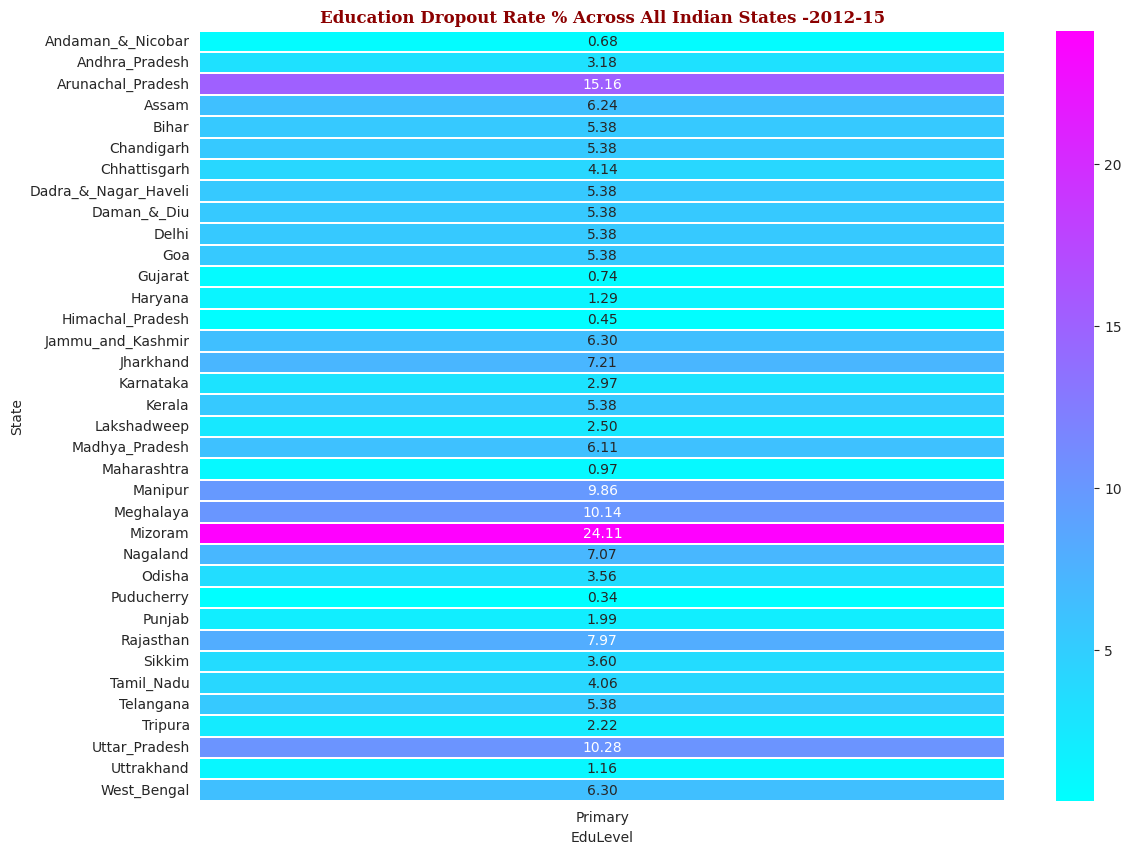

In [198]:
#Plot the dropout rate using heatmap
plotDropOutforStates("All")

In [199]:
#Plot the dropout rate of 2014-15 using heatmap
plotDropOutforStates('2014-15')

DataFrame is empty. Check the filtering criteria.
No data found for 2014-15. Skipping plot.


In [200]:
#Plot the dropout rate using heatmap
def plotDropOutforCategory(Years):
    font={'family': 'serif','color': 'darkred','weight': 'bold','size': 10}
    if Years=="2014-15":
        Title="-" +Years
    else:
        Title="-2012-15"

    df2_EduDropOut_SE = getDropOut_Data(Years, DropUT="No", CategoryData=True)

    #Present the data on Heatmap graph
    fig=plt.figure(figsize=(8,4))
    ax=plt.gca()

    #Heatmap is much better to show this info

    sns.heatmap(df2_EduDropOut_SE, cmap="cool" )

    ax.set_title("Education Dropout Rate % Across All Categories " + Title,fontdict=font)

    plt.savefig("Education-Dropout-Rate-Across-All-Categories" + Title +".png", dpi=150)

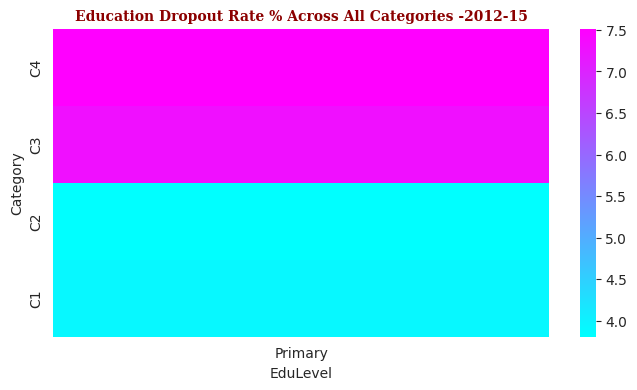

In [203]:
#Plot categorywise Dropout Rate
plotDropOutforCategory("All")

###### Part 2: Task 1: Analyse if there is any correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for the states. Choose an appropriate plot to conduct this analysis.

In [173]:
#This function merges 1A, 1B data provides sectorwise reuired data for plotting purpose
def get_1B_1A_Data(Years, Category):
    # Not using Years Parameter. As per the instruction I have filtered in only 2014-15 data so this
    # fuction return only 2014-15 data

    #Get the data for 1B_GSDP_SectorWise
    df1B_1A_gsdp_sw = get_1B_gsdp_sw_Data()

    #Drop following fields from this DS as it is not required for this plotting
    df1B_1A_gsdp_sw.drop(['Primary%'], axis=1,inplace=True)
    df1B_1A_gsdp_sw.drop(['Secondary%'], axis=1,inplace=True)
    df1B_1A_gsdp_sw.drop(['Tertiary%'], axis=1,inplace=True)
    df1B_1A_gsdp_sw.drop(['GSDP'], axis=1,inplace=True)

    df1B_1A_gsdp_sw = df1B_1A_gsdp_sw.merge(df1B_1A, how="inner", on="State")
    df1B_1A_gsdp_sw = df1B_1A_gsdp_sw.merge(dfCategory, how="inner", on="State")

    if Category != "":
        df1B_1A_gsdp_sw=df1B_1A_gsdp_sw[ df1B_1A_gsdp_sw.Category==Category]
    return df1B_1A_gsdp_sw

In [174]:
#This function plots relationship between Education Dropout & Other Parameters
#If you pass Category like C1, C2, C3, C4 then it will plot the graph only for that Category.
#Bydefault "" is being passed
def plotEducationDropoutWithX(Param, Category):
    if Category not in ['C1','C2','C3','C4']:
        Category=""

    #Get the data of 1B & 1A for ploting
    df1B_1A_gsdp_sw = get_1B_1A_Data(Years="2014-15", Category=Category)
    #Get the data of dropout but leaving UT for plotting
    df2_EduDropOut = getDropOut_Data(Years="2014-15", DropUT="Yes")

    #Merge all the set of information 1A, 1B & 2
    df2_1B_1A = df1B_1A_gsdp_sw.loc[:,['State',Param]].merge(df2_EduDropOut , how="right",on="State")

    #Remove that data from the above dataset which is not required as per the input Parameter of This function
    df2_1B_1A_Param = df2_1B_1A[ ~np.isnan(df2_1B_1A[Param]) ]

    #Plot Scattered Diagram
    font={'family': 'serif','color': 'darkred','weight': 'bold','size': 26}
    graph = sns.pairplot(data=df2_1B_1A_Param)
    sns.set_style("white")

    if Param=="Per_Capita_GDP":
        Title="Per Capita GDP"
    elif Param=="Growth%":
        Title='GDP Growth %'
    elif Param=="Population":
        Title=Param
    elif Param=="GSDP":
        Title=Param
    elif Param=="Primary_Sec":
        Title="Primary Sector Industries"
    elif Param=="Secondary_Sec":
        Title='Secondary Sector Industries'
    elif Param=="Tertiary_Sec":
        Title='Tertiary Sector Industries'


    graph.fig.suptitle("Correlation of "+ Title+ " with Education Dropout rates : 2014-15",\
                       fontdict=font, y=1.02)
    graph.savefig("Correlation-of-GDP-" + Title + "-with-Edu-Dropout-rates-2014-15.png", dpi=150)


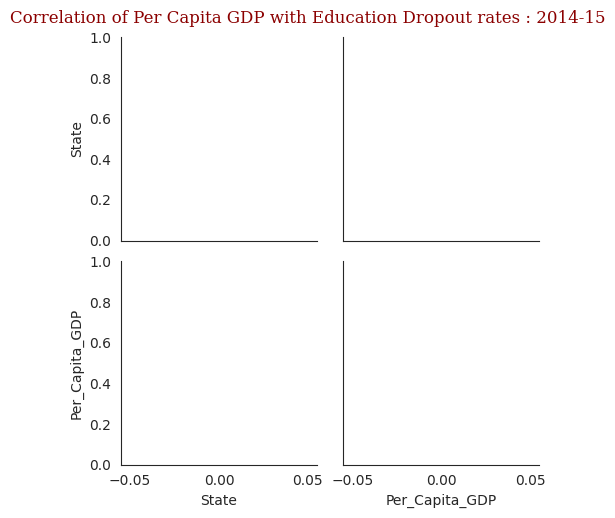

In [175]:
#Plot Relationship between Education Dropout & Per Capita Income
plotEducationDropoutWithX('Per_Capita_GDP',Category="")

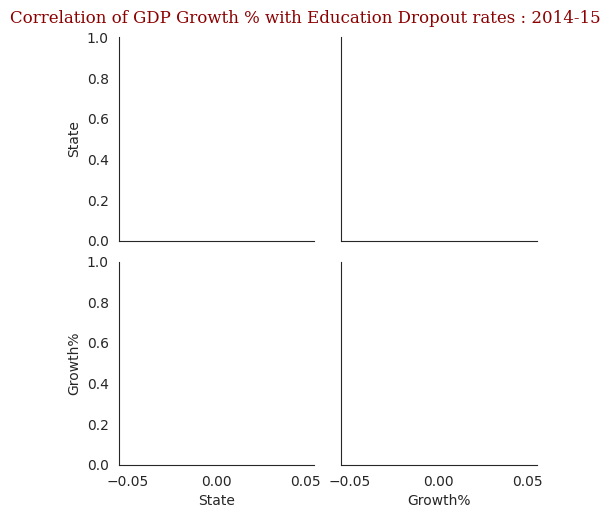

In [176]:
#Plot Relationship between Education Dropout & GDP Growth%
plotEducationDropoutWithX('Growth%',Category="")

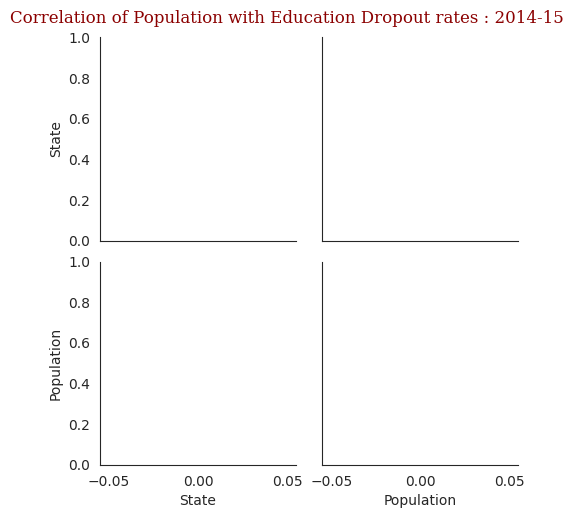

In [177]:
#Plot Relationship between Education Dropout & Population of State
plotEducationDropoutWithX('Population',Category="")

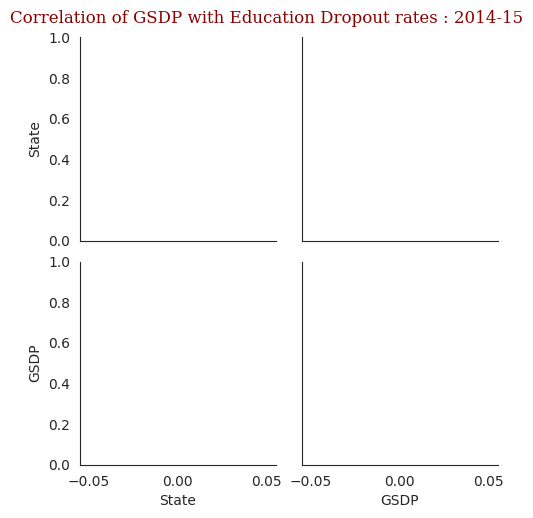

In [178]:
#Plot Relationship between Education Dropout & GSDP of the States
plotEducationDropoutWithX('GSDP',Category="")

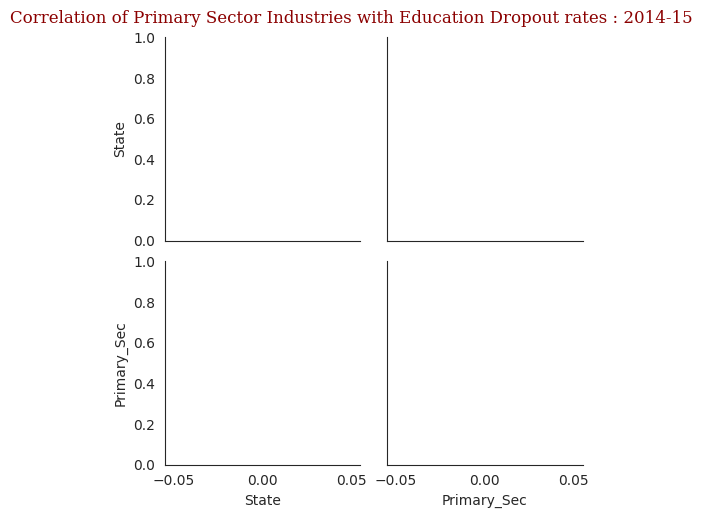

In [179]:
#Plot Relationship between Education Dropout & Primary Sector Industries
plotEducationDropoutWithX('Primary_Sec',Category="")

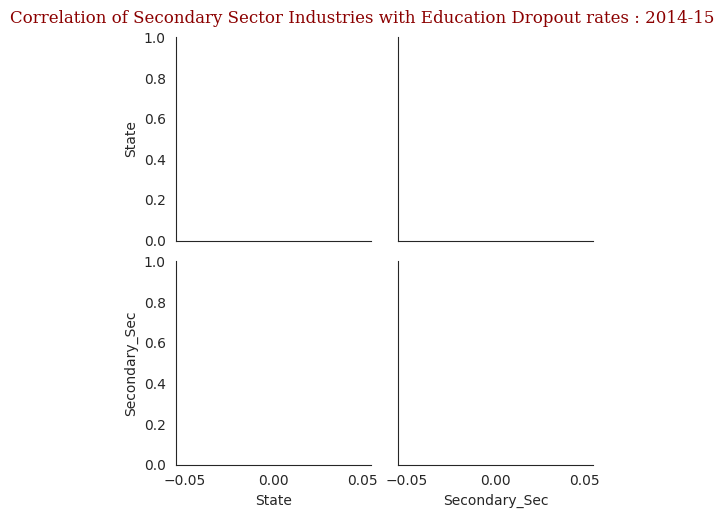

In [180]:
##Plot Relationship between Education Dropout & Secondary Sector Industries
plotEducationDropoutWithX('Secondary_Sec',Category="")

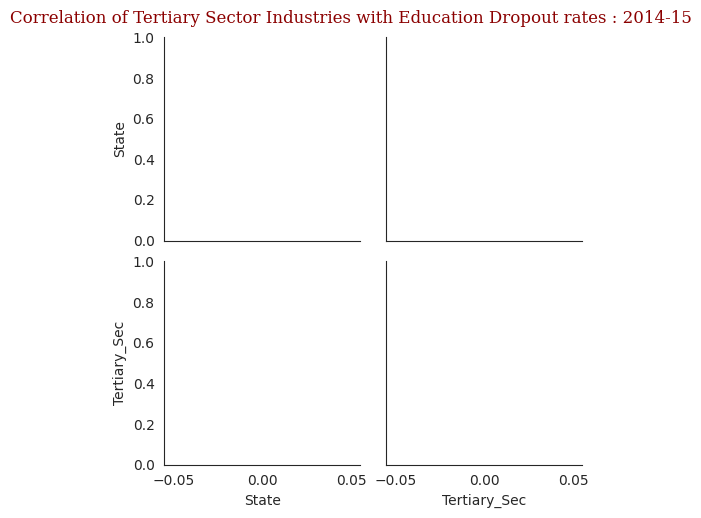

In [181]:
##Plot Relationship between Education Dropout & Tertiary Sector Industries
plotEducationDropoutWithX('Tertiary_Sec',Category="")

###### Part 2: Task 2: Write the key insights you observe from this data. This is part of Powerpoint Presentation.

###### Part 2: Task 3: Form at least one reasonable hypothesis for the observations from the data. This is part of Powerpoint Presentation.